# ResNet Model Building Pipeline for 1D Signals with DEMO
#### ResNet18, ResNet34, ResNet50, ResNet101, ResNet152

In [1]:
import socket
import tornado.iostream

# Create a TCP connection to a server running on localhost at port 8000
sock = socket.create_connection(('localhost', 8888))

# Create an IOStream object with a large buffer size
stream = tornado.iostream.IOStream(sock, max_buffer_size=1073741824)


In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet

In [3]:
columns = ['Fx','Fy','Fz','Mx','My','Mz']
wavelet = 'db4'
max_iter = 50
iter = 0

# Walking Dataset
InsoleWalking1 = pd.read_csv('0310AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking2 = pd.read_csv('0310HudaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking3 = pd.read_csv('0311LalaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking4 = pd.read_csv('0311YunitaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking5 = pd.read_csv('0312AbelRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking6 = pd.read_csv('0312AbiRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking7 = pd.read_csv('0312AryaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking8 = pd.read_csv('0312HawaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking9 = pd.read_csv('0312NisaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking10 = pd.read_csv('0313ChenChengRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking11 = pd.read_csv('0313RezaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking12 = pd.read_csv('0313RilaniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking13 = pd.read_csv('0313SariRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking14 = pd.read_csv('0313ShelbyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking15 = pd.read_csv('0314HelenRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking16 = pd.read_csv('0315AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking17 = pd.read_csv('0315HappyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking18 = pd.read_csv('0317HeniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking19 = pd.read_csv('0317NadiaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking20 = pd.read_csv('0317VikaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking21 = pd.read_csv('0319AlfianRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
SIDatasWalking1 =  np.array(InsoleWalking1)
SIDatasWalking2 =  np.array(InsoleWalking2)
SIDatasWalking3 =  np.array(InsoleWalking3)
SIDatasWalking4 =  np.array(InsoleWalking4)
SIDatasWalking5 =  np.array(InsoleWalking5)
SIDatasWalking6 =  np.array(InsoleWalking6)
SIDatasWalking7 =  np.array(InsoleWalking7)
SIDatasWalking8 =  np.array(InsoleWalking8)
SIDatasWalking9 =  np.array(InsoleWalking9)
SIDatasWalking10 =  np.array(InsoleWalking10)
SIDatasWalking11 =  np.array(InsoleWalking11)
SIDatasWalking12 =  np.array(InsoleWalking12)
SIDatasWalking13 =  np.array(InsoleWalking13)
SIDatasWalking14 =  np.array(InsoleWalking14)
SIDatasWalking15 =  np.array(InsoleWalking15)
SIDatasWalking16 =  np.array(InsoleWalking16)
SIDatasWalking17 =  np.array(InsoleWalking17)
SIDatasWalking18 =  np.array(InsoleWalking18)
SIDatasWalking19 =  np.array(InsoleWalking19)
SIDatasWalking20 =  np.array(InsoleWalking20)
SIDatasWalking21 =  np.array(InsoleWalking21)
SIDatasWalking22 =  np.array(InsoleWalking22)

dfwalk1 = pd.read_csv('0310AyuRWalk5Min.csv', low_memory=False)
dfwalk2 = pd.read_csv('0310HudaRWalk5Min.csv', low_memory=False)
dfwalk3 = pd.read_csv('0311LalaRWalk5Min.csv', low_memory=False)
dfwalk4 = pd.read_csv('0311YunitaRWalk5Min.csv', low_memory=False)
dfwalk5 = pd.read_csv('0312AbelRWalk5Min.csv', low_memory=False)
dfwalk6 = pd.read_csv('0312AbiRWalk5Min.csv', low_memory=False)
dfwalk7 = pd.read_csv('0312AryaRWalk5Min.csv', low_memory=False)
dfwalk8 = pd.read_csv('0312HawaRWalk5Min.csv', low_memory=False)
dfwalk9 = pd.read_csv('0312NisaRWalk5Min.csv', low_memory=False)
dfwalk10 = pd.read_csv('0313ChenChengRWalk5Min.csv', low_memory=False)
dfwalk11 = pd.read_csv('0313RezaRWalk5Min.csv', low_memory=False)
dfwalk12 = pd.read_csv('0313RilaniRWalk5Min.csv', low_memory=False)
dfwalk13 = pd.read_csv('0313SariRWalk5Min.csv', low_memory=False)
dfwalk14 = pd.read_csv('0313ShelbyRWalk5Min.csv', low_memory=False)
dfwalk15 = pd.read_csv('0314HelenRWalk5Min.csv', low_memory=False)
dfwalk16 = pd.read_csv('0315AyuRWalk5Min.csv', low_memory=False)
dfwalk17 = pd.read_csv('0315HappyRWalk5Min.csv', low_memory=False)
dfwalk18 = pd.read_csv('0317HeniRWalk5Min.csv', low_memory=False)
dfwalk19 = pd.read_csv('0317NadiaRWalk5Min.csv', low_memory=False)
dfwalk20 = pd.read_csv('0317VikaRWalk5Min.csv', low_memory=False)
dfwalk21 = pd.read_csv('0319AlfianRWalk5Min.csv', low_memory=False)
dfwalk22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

selected_dfwalks1 = dfwalk1[columns]
selected_dfwalks2 = dfwalk2[columns]
selected_dfwalks3 = dfwalk3[columns]
selected_dfwalks4 = dfwalk4[columns]
selected_dfwalks5 = dfwalk5[columns]
selected_dfwalks6 = dfwalk6[columns]
selected_dfwalks7 = dfwalk7[columns]
selected_dfwalks8 = dfwalk8[columns]
selected_dfwalks9 = dfwalk9[columns]
selected_dfwalks10 = dfwalk10[columns]
selected_dfwalks11 = dfwalk11[columns]
selected_dfwalks12 = dfwalk12[columns]
selected_dfwalks13 = dfwalk13[columns]
selected_dfwalks14 = dfwalk14[columns]
selected_dfwalks15 = dfwalk15[columns]
selected_dfwalks16 = dfwalk16[columns]
selected_dfwalks17 = dfwalk17[columns]
selected_dfwalks18 = dfwalk18[columns]
selected_dfwalks19 = dfwalk19[columns]
selected_dfwalks20 = dfwalk20[columns]
selected_dfwalks21 = dfwalk21[columns]
selected_dfwalks22 = dfwalk22[columns]
FPDatasWalking1 = selected_dfwalks1[:15000]
FPDatasWalking2 = selected_dfwalks2[:15000]
FPDatasWalking3 = selected_dfwalks3[:15000]
FPDatasWalking4 = selected_dfwalks4[:15000]
FPDatasWalking5 = selected_dfwalks5[:15000]
FPDatasWalking6 = selected_dfwalks6[:15000]
FPDatasWalking7 = selected_dfwalks7[:15000]
FPDatasWalking8 = selected_dfwalks8[:15000]
FPDatasWalking9 = selected_dfwalks9[:15000]
FPDatasWalking10 = selected_dfwalks10[:15000]
FPDatasWalking11 = selected_dfwalks11[:15000]
FPDatasWalking12 = selected_dfwalks12[:15000]
FPDatasWalking13 = selected_dfwalks13[:15000]
FPDatasWalking14 = selected_dfwalks14[:15000]
FPDatasWalking15 = selected_dfwalks15[:15000]
FPDatasWalking16 = selected_dfwalks16[:15000]
FPDatasWalking17 = selected_dfwalks17[:15000]
FPDatasWalking18 = selected_dfwalks18[:15000]
FPDatasWalking19 = selected_dfwalks19[:15000]
FPDatasWalking20 = selected_dfwalks20[:15000]
FPDatasWalking21 = selected_dfwalks21[:15000]
FPDatasWalking22 = selected_dfwalks22[:15000]

SIDataWalking1 = np.array(SIDatasWalking1[:15000]).astype('float32')
SIDataWalking2 = np.array(SIDatasWalking2[:15000]).astype('float32')
SIDataWalking3 = np.array(SIDatasWalking3[:15000]).astype('float32')
SIDataWalking4 = np.array(SIDatasWalking4[:15000]).astype('float32')
SIDataWalking5 = np.array(SIDatasWalking5[:15000]).astype('float32')
SIDataWalking6 = np.array(SIDatasWalking6[:15000]).astype('float32')
SIDataWalking7 = np.array(SIDatasWalking7[:15000]).astype('float32')
SIDataWalking8 = np.array(SIDatasWalking8[:15000]).astype('float32')
SIDataWalking9 = np.array(SIDatasWalking9[:15000]).astype('float32')
SIDataWalking10 = np.array(SIDatasWalking10[:15000]).astype('float32')
SIDataWalking11 = np.array(SIDatasWalking11[:15000]).astype('float32')
SIDataWalking12 = np.array(SIDatasWalking12[:15000]).astype('float32')
SIDataWalking13 = np.array(SIDatasWalking13[:15000]).astype('float32')
SIDataWalking14 = np.array(SIDatasWalking14[:15000]).astype('float32')
SIDataWalking15 = np.array(SIDatasWalking15[:15000]).astype('float32')
SIDataWalking16 = np.array(SIDatasWalking16[:15000]).astype('float32')
SIDataWalking17 = np.array(SIDatasWalking17[:15000]).astype('float32')
SIDataWalking18 = np.array(SIDatasWalking18[:15000]).astype('float32')
SIDataWalking19 = np.array(SIDatasWalking19[:15000]).astype('float32')
SIDataWalking20 = np.array(SIDatasWalking20[:15000]).astype('float32')
SIDataWalking21 = np.array(SIDatasWalking21[:15000]).astype('float32')
SIDataWalking22 = np.array(SIDatasWalking22[:15000]).astype('float32')
FPDataWalking1 = np.array(FPDatasWalking1).astype('float32')
FPDataWalking2 = np.array(FPDatasWalking2).astype('float32')
FPDataWalking3= np.array(FPDatasWalking3).astype('float32')
FPDataWalking4= np.array(FPDatasWalking4).astype('float32')
FPDataWalking5= np.array(FPDatasWalking5).astype('float32')
FPDataWalking6= np.array(FPDatasWalking6).astype('float32')
FPDataWalking7= np.array(FPDatasWalking7).astype('float32')
FPDataWalking8= np.array(FPDatasWalking8).astype('float32')
FPDataWalking9= np.array(FPDatasWalking9).astype('float32')
FPDataWalking10 = np.array(FPDatasWalking10).astype('float32')
FPDataWalking11 = np.array(FPDatasWalking11).astype('float32')
FPDataWalking12= np.array(FPDatasWalking12).astype('float32')
FPDataWalking13= np.array(FPDatasWalking13).astype('float32')
FPDataWalking14= np.array(FPDatasWalking14).astype('float32')
FPDataWalking15= np.array(FPDatasWalking15).astype('float32')
FPDataWalking16= np.array(FPDatasWalking16).astype('float32')
FPDataWalking17= np.array(FPDatasWalking17).astype('float32')
FPDataWalking18= np.array(FPDatasWalking18).astype('float32')
FPDataWalking19= np.array(FPDatasWalking19).astype('float32')
FPDataWalking20= np.array(FPDatasWalking20).astype('float32')
FPDataWalking21= np.array(FPDatasWalking21).astype('float32')
FPDataWalking22= np.array(FPDatasWalking22).astype('float32')

SIDatasetWalking = np.concatenate((SIDataWalking1, SIDataWalking2, SIDataWalking3,
                            SIDataWalking4, SIDataWalking5, SIDataWalking6,
                            SIDataWalking7, SIDataWalking8, SIDataWalking9,
                            SIDataWalking10, SIDataWalking11, SIDataWalking12,
                            SIDataWalking13, SIDataWalking14, SIDataWalking15,
                            SIDataWalking16, SIDataWalking17, SIDataWalking18,
                            SIDataWalking19, SIDataWalking20, SIDataWalking21,
                            SIDataWalking22), axis=0)
                            
FPDatasetWalking = np.concatenate((FPDataWalking1, FPDataWalking2, FPDataWalking3,
                            FPDataWalking4, FPDataWalking5, FPDataWalking6,
                            FPDataWalking7, FPDataWalking8, FPDataWalking9,
                            FPDataWalking10, FPDataWalking11, FPDataWalking12,
                            FPDataWalking13, FPDataWalking14, FPDataWalking15,
                            FPDataWalking16, FPDataWalking17, FPDataWalking18,
                            FPDataWalking19, FPDataWalking20, FPDataWalking21,
                            FPDataWalking22), axis=0)

# SIDatasetWalking = SIDataWalking1
# FPDatasetWalking = FPDataWalking1

# SIDatasetWalking = np.array(SIDatasetWalking).astype('float64')
# FPDatasetWalking = np.array(FPDatasetWalking).astype('float64')

# Standing Dataset
InsoleStanding1 = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
InsoleStanding2 = pd.read_csv('0310HudaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding3 = pd.read_csv('0311LalaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding4 = pd.read_csv('0311YunitaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding5 = pd.read_csv('0312AbelStand5Min1.txt', header=None, low_memory=False)
InsoleStanding6 = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
InsoleStanding7 = pd.read_csv('0312AryaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding8 = pd.read_csv('0312HawaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding9 = pd.read_csv('0312NisaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding10 = pd.read_csv('0313ChenChengStand5Min1.txt', header=None, low_memory=False)
InsoleStanding11 = pd.read_csv('0313RezaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding12 = pd.read_csv('0313RilaniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding13 = pd.read_csv('0313SariStand5Min1.txt', header=None, low_memory=False)
InsoleStanding14 = pd.read_csv('0313ShelbyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding15 = pd.read_csv('0314HelenStand5Min1.txt', header=None, low_memory=False)
InsoleStanding16 = pd.read_csv('0315AyuStand5Min1.txt', header=None, low_memory=False)
InsoleStanding17 = pd.read_csv('0315HappyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding18 = pd.read_csv('0317HeniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding19 = pd.read_csv('0317NadiaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding20 = pd.read_csv('0317VikaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding21 = pd.read_csv('0319AlfianStand5Min1.txt', header=None, low_memory=False)
InsoleStanding22 = pd.read_csv('0310JakaStand2Min.txt', header=None, low_memory=False)
SIDatasStanding1 =  np.array(InsoleStanding1)
SIDatasStanding2 =  np.array(InsoleStanding2)
SIDatasStanding3 =  np.array(InsoleStanding3)
SIDatasStanding4 =  np.array(InsoleStanding4)
SIDatasStanding5 =  np.array(InsoleStanding5)
SIDatasStanding6 =  np.array(InsoleStanding6)
SIDatasStanding7 =  np.array(InsoleStanding7)
SIDatasStanding8 =  np.array(InsoleStanding8)
SIDatasStanding9 =  np.array(InsoleStanding9)
SIDatasStanding10 =  np.array(InsoleStanding10)
SIDatasStanding11 =  np.array(InsoleStanding11)
SIDatasStanding12 =  np.array(InsoleStanding12)
SIDatasStanding13 =  np.array(InsoleStanding13)
SIDatasStanding14 =  np.array(InsoleStanding14)
SIDatasStanding15 =  np.array(InsoleStanding15)
SIDatasStanding16 =  np.array(InsoleStanding16)
SIDatasStanding17 =  np.array(InsoleStanding17)
SIDatasStanding18 =  np.array(InsoleStanding18)
SIDatasStanding19 =  np.array(InsoleStanding19)
SIDatasStanding20 =  np.array(InsoleStanding20)
SIDatasStanding21 =  np.array(InsoleStanding21)
SIDatasStanding22 =  np.array(InsoleStanding22)

dfStanding1 = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
dfStanding2 = pd.read_csv('0310HudaStand5Min1.csv', low_memory=False)
dfStanding3 = pd.read_csv('0311LalaStand5Min1.csv', low_memory=False)
dfStanding4 = pd.read_csv('0311YunitaStand5Min1.csv', low_memory=False)
dfStanding5 = pd.read_csv('0312AbelStand5Min1.csv', low_memory=False)
dfStanding6 = pd.read_csv('0312AbiStand5Min1.csv', low_memory=False)
dfStanding7 = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
dfStanding8 = pd.read_csv('0312HawaStand5Min1.csv', low_memory=False)
dfStanding9 = pd.read_csv('0312NisaStand5Min1.csv', low_memory=False)
dfStanding10 = pd.read_csv('0313ChenChengStand5Min1.csv', low_memory=False)
dfStanding11 = pd.read_csv('0313RezaStand5Min1.csv', low_memory=False)
dfStanding12 = pd.read_csv('0313RilaniStand5Min1.csv', low_memory=False)
dfStanding13 = pd.read_csv('0313SariStand5Min1.csv', low_memory=False)
dfStanding14 = pd.read_csv('0313ShelbyStand5Min1.csv', low_memory=False)
dfStanding15 = pd.read_csv('0314HelenStand5Min1.csv', low_memory=False)
dfStanding16 = pd.read_csv('0315AyuStand5Min1.csv', low_memory=False)
dfStanding17 = pd.read_csv('0315HappyStand5Min1.csv', low_memory=False)
dfStanding18 = pd.read_csv('0317HeniStand5Min1.csv', low_memory=False)
dfStanding19 = pd.read_csv('0317NadiaStand5Min1.csv', low_memory=False)
dfStanding20 = pd.read_csv('0317VikaStand5Min1.csv', low_memory=False)
dfStanding21 = pd.read_csv('0319AlfianStand5Min1.csv', low_memory=False)
dfStanding22 = pd.read_csv('0310JakaStand2Min.csv', low_memory=False)

selected_dfStandings1 = dfStanding1[columns]
selected_dfStandings2 = dfStanding2[columns]
selected_dfStandings3 = dfStanding3[columns]
selected_dfStandings4 = dfStanding4[columns]
selected_dfStandings5 = dfStanding5[columns]
selected_dfStandings6 = dfStanding6[columns]
selected_dfStandings7 = dfStanding7[columns]
selected_dfStandings8 = dfStanding8[columns]
selected_dfStandings9 = dfStanding9[columns]
selected_dfStandings10 = dfStanding10[columns]
selected_dfStandings11 = dfStanding11[columns]
selected_dfStandings12 = dfStanding12[columns]
selected_dfStandings13 = dfStanding13[columns]
selected_dfStandings14 = dfStanding14[columns]
selected_dfStandings15 = dfStanding15[columns]
selected_dfStandings16 = dfStanding16[columns]
selected_dfStandings17 = dfStanding17[columns]
selected_dfStandings18 = dfStanding18[columns]
selected_dfStandings19 = dfStanding19[columns]
selected_dfStandings20 = dfStanding20[columns]
selected_dfStandings21 = dfStanding21[columns]
selected_dfStandings22 = dfStanding22[columns]
FPDataStandings1 = selected_dfStandings1[:15000]
FPDataStandings2 = selected_dfStandings2[:15000]
FPDataStandings3 = selected_dfStandings3[:15000]
FPDataStandings4 = selected_dfStandings4[:15000]
FPDataStandings5 = selected_dfStandings5[:15000]
FPDataStandings6 = selected_dfStandings6[:15000]
FPDataStandings7 = selected_dfStandings7[:15000]
FPDataStandings8 = selected_dfStandings8[:15000]
FPDataStandings9 = selected_dfStandings9[:15000]
FPDataStandings10 = selected_dfStandings10[:15000]
FPDataStandings11 = selected_dfStandings11[:15000]
FPDataStandings12 = selected_dfStandings12[:15000]
FPDataStandings13 = selected_dfStandings13[:15000]
FPDataStandings14 = selected_dfStandings14[:15000]
FPDataStandings15 = selected_dfStandings15[:15000]
FPDataStandings16 = selected_dfStandings16[:15000]
FPDataStandings17 = selected_dfStandings17[:15000]
FPDataStandings18 = selected_dfStandings18[:15000]
FPDataStandings19 = selected_dfStandings19[:15000]
FPDataStandings20 = selected_dfStandings20[:15000]
FPDataStandings21 = selected_dfStandings21[:15000]
FPDataStandings22 = selected_dfStandings22[:15000]

SIDataStanding1 = np.array(SIDatasStanding1[:15000]).astype('float32')
SIDataStanding2 = np.array(SIDatasStanding2[:15000]).astype('float32')
SIDataStanding3 = np.array(SIDatasStanding3[:15000]).astype('float32')
SIDataStanding4 = np.array(SIDatasStanding4[:15000]).astype('float32')
SIDataStanding5 = np.array(SIDatasStanding5[:15000]).astype('float32')
SIDataStanding6 = np.array(SIDatasStanding6[:15000]).astype('float32')
SIDataStanding7 = np.array(SIDatasStanding7[:15000]).astype('float32')
SIDataStanding8 = np.array(SIDatasStanding8[:15000]).astype('float32')
SIDataStanding9 = np.array(SIDatasStanding9[:15000]).astype('float32')
SIDataStanding10 = np.array(SIDatasStanding10[:15000]).astype('float32')
SIDataStanding11 = np.array(SIDatasStanding11[:15000]).astype('float32')
SIDataStanding12 = np.array(SIDatasStanding12[:15000]).astype('float32')
SIDataStanding13 = np.array(SIDatasStanding13[:15000]).astype('float32')
SIDataStanding14 = np.array(SIDatasStanding14[:15000]).astype('float32')
SIDataStanding15 = np.array(SIDatasStanding15[:15000]).astype('float32')
SIDataStanding16 = np.array(SIDatasStanding16[:15000]).astype('float32')
SIDataStanding17 = np.array(SIDatasStanding17[:15000]).astype('float32')
SIDataStanding18 = np.array(SIDatasStanding18[:15000]).astype('float32')
SIDataStanding19 = np.array(SIDatasStanding19[:15000]).astype('float32')
SIDataStanding20 = np.array(SIDatasStanding20[:15000]).astype('float32')
SIDataStanding21 = np.array(SIDatasStanding21[:15000]).astype('float32')
SIDataStanding22 = np.array(SIDatasStanding22[:15000]).astype('float32')
FPDataStanding1 = np.array(FPDataStandings1).astype('float32')
FPDataStanding2 = np.array(FPDataStandings2).astype('float32')
FPDataStanding3= np.array(FPDataStandings3).astype('float32')
FPDataStanding4= np.array(FPDataStandings4).astype('float32')
FPDataStanding5= np.array(FPDataStandings5).astype('float32')
FPDataStanding6= np.array(FPDataStandings6).astype('float32')
FPDataStanding7= np.array(FPDataStandings7).astype('float32')
FPDataStanding8= np.array(FPDataStandings8).astype('float32')
FPDataStanding9= np.array(FPDataStandings9).astype('float32')
FPDataStanding10 = np.array(FPDataStandings10).astype('float32')
FPDataStanding11 = np.array(FPDataStandings11).astype('float32')
FPDataStanding12= np.array(FPDataStandings12).astype('float32')
FPDataStanding13= np.array(FPDataStandings13).astype('float32')
FPDataStanding14= np.array(FPDataStandings14).astype('float32')
FPDataStanding15= np.array(FPDataStandings15).astype('float32')
FPDataStanding16= np.array(FPDataStandings16).astype('float32')
FPDataStanding17= np.array(FPDataStandings17).astype('float32')
FPDataStanding18= np.array(FPDataStandings18).astype('float32')
FPDataStanding19= np.array(FPDataStandings19).astype('float32')
FPDataStanding20= np.array(FPDataStandings20).astype('float32')
FPDataStanding21= np.array(FPDataStandings21).astype('float32')
FPDataStanding22= np.array(FPDataStandings22).astype('float32')

SIDatasetStanding = np.concatenate((SIDataStanding1,
                            SIDataStanding4, SIDataStanding5, SIDataStanding6,
                            SIDataStanding7, SIDataStanding8, SIDataStanding9,
                            SIDataStanding10, SIDataStanding11, SIDataStanding12,
                            SIDataStanding13, SIDataStanding14, SIDataStanding15,
                            SIDataStanding16, SIDataStanding17, SIDataStanding18,
                            SIDataStanding19, SIDataStanding20, SIDataStanding21,
                            SIDataStanding22), axis=0)

# SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3), axis=0)
# FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3), axis=0)
                            
FPDatasetStanding = np.concatenate((FPDataStanding1, 
                            FPDataStanding4, FPDataStanding5, FPDataStanding6,
                            FPDataStanding7, FPDataStanding8, FPDataStanding9,
                            FPDataStanding10, FPDataStanding11, FPDataStanding12,
                            FPDataStanding13, FPDataStanding14, FPDataStanding15,
                            FPDataStanding16, FPDataStanding17, FPDataStanding18,
                            FPDataStanding19, FPDataStanding20, FPDataStanding21,
                            FPDataStanding22), axis=0)

# SIDatasetStanding = SIDataStanding1
# FPDatasetStanding = FPDataStanding1

SIDatasetStanding = np.array(SIDatasetStanding).astype('float32')
FPDatasetStanding = np.array(FPDatasetStanding).astype('float32')

# Concat Standing and Walking
# SIDataset = np.concatenate((SIDatasetWalking,SIDatasetStanding), axis=0)
# FPDataset = np.concatenate((FPDatasetWalking,FPDatasetStanding), axis=0)
# SIDataset = SIDatasetStanding
# FPDataset = FPDatasetStanding

SIDataset = SIDatasetStanding[:291000]
FPDataset = FPDatasetStanding[:291000]

FXData = FPDataset[:,0]/2
FXData =  np.array(FXData)
FXData = FXData.reshape(-1,1)
FYData = FPDataset[:,1]/5
FYData =  np.array(FYData)
FYData = FYData.reshape(-1,1)
FZData = (FPDataset[:,2])/100
FZData =  np.array(FZData)
FZData = FZData.reshape(-1,1)
MXData = (FPDataset[:,3])/10000
MXData =  np.array(MXData)
MXData = MXData.reshape(-1,1)
MYData = (FPDataset[:,4])/10000
MYData =  np.array(MYData)
MYData = MYData.reshape(-1,1)
MZData = (FPDataset[:,5])/1000
MZData =  np.array(MZData)
MZData = MZData.reshape(-1,1)

newFPDataset = np.concatenate((FXData, FYData, FZData, MXData, MYData, MZData), axis=1)
## End Load Data

wavelet = 'db4'

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SIDataset[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SIDataset.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

# max_iter = 50
# iter = 0
for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = np.round(SIData_filtered[i][0] + (iter % max_iter) + 1,0)
    iter += 1

# for i in range(len(SIDataset)):
#     if i < len(SIDatasetWalking):
#         SIData_filtered[i][0] = np.round(SIData_filtered[i][0] + (iter % max_iter) + 1,0)
#         iter += 1
#     else:
#         SIData_filtered[i][0] = 0
#         # SIData_filtered[i][0] = i-314999

for i in range(len(SIData_filtered)):
    SIData_filtered[i][np.abs(SIData_filtered[i]) < 1] = 0

    
# Data Normalization
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_x.fit(SIData_filtered)
xscale = scaler_x.transform(SIData_filtered)

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(newFPDataset)
yscale = scaler_y.transform(newFPDataset)
#End Data Normalization

print(xscale.shape)
print(yscale.shape)

#Spliting Data
sample_size = xscale.shape[0] # number of samples in train set
time_steps  = xscale.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = xscale.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, yscale, test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#End Spliting Data

(291000, 89)
(291000, 6)
(232800, 89, 1) (58200, 89, 1)
(232800, 6) (58200, 6)


In [4]:
SIData_filtered[0:250,0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50.,  1.,  2.,  3.,  4.,  5.,  6.,
        7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31

In [5]:
newFPDataset[50]

array([ 4.752735 ,  1.16801  , -3.9976401, -0.319121 , -7.4322705,
       -3.8692   ], dtype=float32)

Configurations

In [6]:
"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 6           # Number of Outputs in the Regression Mode

Build Model

In [7]:
class AdamW(Adam):
    def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
        super(AdamW, self).__init__(learning_rate, **kwargs)
        self.weight_decay = weight_decay

    def get_gradients(self, loss, params):
        gradients = super(AdamW, self).get_gradients(loss, params)
        if self.weight_decay > 0.0:
            for i in range(len(gradients)):
                if gradients[i] is not None:
                    gradients[i] += self.weight_decay * params[i]
        return gradients

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet18() # Build Model
# ResNet Models supported: ResNet18, ResNet34, ResNet50, ResNet101, ResNet152, 
Regression_Model.compile(loss='mse', optimizer=AdamW(learning_rate=0.0001, weight_decay=0.01), metrics= ['mse']) # Compile Model
# Here, Model validation metric is set as Mean Squared Error or MSE

Model_Summary

In [8]:
Regression_Model.summary() # Summary of the Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 45, 64)       512         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 45, 64)       0           ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 22, 64)       0           ['activation[0][0]']             
                                                                                              

 conv1d_14 (Conv1D)             (None, 3, 512)       786944      ['activation_17[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 3, 512)       0           ['conv1d_14[0][0]']              
                                                                                                  
 conv1d_15 (Conv1D)             (None, 3, 512)       786944      ['activation_18[0][0]']          
                                                                                                  
 activation_19 (Activation)     (None, 3, 512)       0           ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_16 (Conv1D)             (None, 3, 512)       786944      ['activation_19[0][0]']          
                                                                                                  
 activatio

Upload Past Weights if available (Transfer Learning)

In [9]:
# Regression_Model.load_weights('Saved_Model.h5') # Load Previously Trained Weights for Transfer Learning

Train Model for 'n' number of Epochs with Batch size of 'm'

In [10]:
epochs = 500
initial_learning_rate = 0.0001
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):    
   return lr*0.95  

callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min'),
    LearningRateScheduler(lr_time_based_decay, verbose=2)
            ]
history = Regression_Model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)
# Save 'History' of the model for model performance analysis performed later


Epoch 1: LearningRateScheduler setting learning rate to 9.499999760009814e-05.
Epoch 1/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0204 - mse: 0.0204
Epoch 1: val_loss improved from inf to 0.00153, saving model to Saved_Model.h5
2910/2910 [==============================] - 37s 12ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0015 - val_mse: 0.0015 - lr: 9.5000e-05

Epoch 2: LearningRateScheduler setting learning rate to 9.02499959920533e-05.
Epoch 2/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.0016
Epoch 2: val_loss did not improve from 0.00153
2910/2910 [==============================] - 35s 12ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0017 - val_mse: 0.0017 - lr: 9.0250e-05

Epoch 3: LearningRateScheduler setting learning rate to 8.573749619245064e-05.
Epoch 3/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013
Epoch 3: val_loss improved from 0.00153 to 0.00117, saving model to S


Epoch 21: LearningRateScheduler setting learning rate to 3.4056162621709515e-05.
Epoch 21/500
2906/2910 [============================>.] - ETA: 0s - loss: 5.1358e-04 - mse: 5.1358e-04
Epoch 21: val_loss improved from 0.00053 to 0.00052, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 5.1350e-04 - mse: 5.1350e-04 - val_loss: 5.1549e-04 - val_mse: 5.1549e-04 - lr: 3.4056e-05

Epoch 22: LearningRateScheduler setting learning rate to 3.2353355527448004e-05.
Epoch 22/500
2906/2910 [============================>.] - ETA: 0s - loss: 4.9646e-04 - mse: 4.9646e-04
Epoch 22: val_loss improved from 0.00052 to 0.00051, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 4.9643e-04 - mse: 4.9643e-04 - val_loss: 5.0684e-04 - val_mse: 5.0684e-04 - lr: 3.2353e-05

Epoch 23: LearningRateScheduler setting learning rate to 3.0735688960703554e-05.
Epoch 23/500
2906/2910 [============================>.] - ETA: 0

2906/2910 [============================>.] - ETA: 0s - loss: 3.2103e-04 - mse: 3.2103e-04
Epoch 40: val_loss improved from 0.00036 to 0.00035, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 3.2098e-04 - mse: 3.2098e-04 - val_loss: 3.5081e-04 - val_mse: 3.5081e-04 - lr: 1.2851e-05

Epoch 41: LearningRateScheduler setting learning rate to 1.2208655698486835e-05.
Epoch 41/500
2906/2910 [============================>.] - ETA: 0s - loss: 3.1446e-04 - mse: 3.1446e-04
Epoch 41: val_loss did not improve from 0.00035
2910/2910 [==============================] - 35s 12ms/step - loss: 3.1444e-04 - mse: 3.1444e-04 - val_loss: 3.5272e-04 - val_mse: 3.5272e-04 - lr: 1.2209e-05

Epoch 42: LearningRateScheduler setting learning rate to 1.159822299996449e-05.
Epoch 42/500
2906/2910 [============================>.] - ETA: 0s - loss: 3.0973e-04 - mse: 3.0973e-04
Epoch 42: val_loss improved from 0.00035 to 0.00034, saving model to Saved_Model.h5
2910/2910

2910/2910 [==============================] - 35s 12ms/step - loss: 2.4998e-04 - mse: 2.4998e-04 - val_loss: 2.9265e-04 - val_mse: 2.9265e-04 - lr: 4.8495e-06

Epoch 60: LearningRateScheduler setting learning rate to 4.606979950949607e-06.
Epoch 60/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.4783e-04 - mse: 2.4783e-04
Epoch 60: val_loss did not improve from 0.00029
2910/2910 [==============================] - 35s 12ms/step - loss: 2.4784e-04 - mse: 2.4784e-04 - val_loss: 2.9354e-04 - val_mse: 2.9354e-04 - lr: 4.6070e-06

Epoch 61: LearningRateScheduler setting learning rate to 4.376630931801628e-06.
Epoch 61/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.4597e-04 - mse: 2.4597e-04
Epoch 61: val_loss improved from 0.00029 to 0.00029, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.4598e-04 - mse: 2.4598e-04 - val_loss: 2.8910e-04 - val_mse: 2.8910e-04 - lr: 4.3766e-06

Epoch 62: LearningRateSch

Epoch 79/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.2192e-04 - mse: 2.2192e-04
Epoch 79: val_loss improved from 0.00027 to 0.00027, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.2192e-04 - mse: 2.2192e-04 - val_loss: 2.7043e-04 - val_mse: 2.7043e-04 - lr: 1.7385e-06

Epoch 80: LearningRateScheduler setting learning rate to 1.6515375534709164e-06.
Epoch 80/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.2120e-04 - mse: 2.2120e-04
Epoch 80: val_loss did not improve from 0.00027
2910/2910 [==============================] - 35s 12ms/step - loss: 2.2119e-04 - mse: 2.2119e-04 - val_loss: 2.7059e-04 - val_mse: 2.7059e-04 - lr: 1.6515e-06

Epoch 81: LearningRateScheduler setting learning rate to 1.5689606811974954e-06.
Epoch 81/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.2035e-04 - mse: 2.2035e-04
Epoch 81: val_loss improved from 0.00027 to 0.00027, saving model to Saved_Mode


Epoch 99: LearningRateScheduler setting learning rate to 6.232136598782745e-07.
Epoch 99/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.1158e-04 - mse: 2.1158e-04
Epoch 99: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.1158e-04 - mse: 2.1158e-04 - val_loss: 2.6415e-04 - val_mse: 2.6415e-04 - lr: 6.2321e-07

Epoch 100: LearningRateScheduler setting learning rate to 5.920529957847975e-07.
Epoch 100/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.1128e-04 - mse: 2.1128e-04
Epoch 100: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.1127e-04 - mse: 2.1127e-04 - val_loss: 2.6384e-04 - val_mse: 2.6384e-04 - lr: 5.9205e-07

Epoch 101: LearningRateScheduler setting learning rate to 5.62450321694996e-07.
Epoch 101/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.1098e-04 - mse: 2.1098e


Epoch 119: LearningRateScheduler setting learning rate to 2.2341330137010117e-07.
Epoch 119/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0772e-04 - mse: 2.0772e-04
Epoch 119: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0771e-04 - mse: 2.0771e-04 - val_loss: 2.6171e-04 - val_mse: 2.6171e-04 - lr: 2.2341e-07

Epoch 120: LearningRateScheduler setting learning rate to 2.1224263022645573e-07.
Epoch 120/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0760e-04 - mse: 2.0760e-04
Epoch 120: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0760e-04 - mse: 2.0760e-04 - val_loss: 2.6170e-04 - val_mse: 2.6170e-04 - lr: 2.1224e-07

Epoch 121: LearningRateScheduler setting learning rate to 2.0163049399002373e-07.
Epoch 121/500
2906/2910 [============================>.] 


Epoch 139: LearningRateScheduler setting learning rate to 8.00905333164792e-08.
Epoch 139/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0630e-04 - mse: 2.0630e-04
Epoch 139: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0629e-04 - mse: 2.0629e-04 - val_loss: 2.6100e-04 - val_mse: 2.6100e-04 - lr: 8.0091e-08

Epoch 140: LearningRateScheduler setting learning rate to 7.608600327557724e-08.
Epoch 140/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0623e-04 - mse: 2.0623e-04
Epoch 140: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0624e-04 - mse: 2.0624e-04 - val_loss: 2.6095e-04 - val_mse: 2.6095e-04 - lr: 7.6086e-08

Epoch 141: LearningRateScheduler setting learning rate to 7.228170311179838e-08.
Epoch 141/500
2906/2910 [============================>.] - ET


Epoch 159: LearningRateScheduler setting learning rate to 2.871132611659277e-08.
Epoch 159/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0577e-04 - mse: 2.0577e-04
Epoch 159: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0575e-04 - mse: 2.0575e-04 - val_loss: 2.6076e-04 - val_mse: 2.6076e-04 - lr: 2.8711e-08

Epoch 160: LearningRateScheduler setting learning rate to 2.7275760317024833e-08.
Epoch 160/500
2910/2910 [==============================] - ETA: 0s - loss: 2.0573e-04 - mse: 2.0573e-04
Epoch 160: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0573e-04 - mse: 2.0573e-04 - val_loss: 2.6073e-04 - val_mse: 2.6073e-04 - lr: 2.7276e-08

Epoch 161: LearningRateScheduler setting learning rate to 2.591197230117359e-08.
Epoch 161/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0574e-04 - mse: 2.

2906/2910 [============================>.] - ETA: 0s - loss: 2.0556e-04 - mse: 2.0556e-04
Epoch 179: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0554e-04 - mse: 2.0554e-04 - val_loss: 2.6068e-04 - val_mse: 2.6068e-04 - lr: 1.0293e-08

Epoch 180: LearningRateScheduler setting learning rate to 9.777976428537727e-09.
Epoch 180/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0554e-04 - mse: 2.0554e-04
Epoch 180: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0553e-04 - mse: 2.0553e-04 - val_loss: 2.6067e-04 - val_mse: 2.6067e-04 - lr: 9.7780e-09

Epoch 181: LearningRateScheduler setting learning rate to 9.289077818053215e-09.
Epoch 181/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0551e-04 - mse: 2.0551e-04
Epoch 181: val_loss improved from 0.00026 to 0.00026

2910/2910 [==============================] - 35s 12ms/step - loss: 2.0547e-04 - mse: 2.0547e-04 - val_loss: 2.6067e-04 - val_mse: 2.6067e-04 - lr: 3.6898e-09

Epoch 200: LearningRateScheduler setting learning rate to 3.505267409664725e-09.
Epoch 200/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 200: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0546e-04 - mse: 2.0546e-04 - val_loss: 2.6067e-04 - val_mse: 2.6067e-04 - lr: 3.5053e-09

Epoch 201: LearningRateScheduler setting learning rate to 3.3300040391814887e-09.
Epoch 201/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 201: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0546e-04 - mse: 2.0546e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 3.3300e-09

Epoch 202: Learnin

2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 1.3227e-09

Epoch 220: LearningRateScheduler setting learning rate to 1.256588999520858e-09.
Epoch 220/500
2910/2910 [==============================] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 220: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 1.2566e-09

Epoch 221: LearningRateScheduler setting learning rate to 1.1937596022804086e-09.
Epoch 221/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 221: val_loss improved from 0.00026 to 0.00026, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 


Epoch 240: LearningRateScheduler setting learning rate to 4.5046955055028093e-10.
Epoch 240/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0543e-04 - mse: 2.0543e-04
Epoch 240: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 4.5047e-10

Epoch 241: LearningRateScheduler setting learning rate to 4.2794607302276686e-10.
Epoch 241/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 241: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 4.2795e-10

Epoch 242: LearningRateScheduler setting learning rate to 4.0654876409806913e-10.
Epoch 242/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0546e-04 - mse: 2.0546e-04
Epoch 242: val_loss did n


Epoch 261: LearningRateScheduler setting learning rate to 1.534126409241665e-10.
Epoch 261/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0544e-04 - mse: 2.0544e-04
Epoch 261: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 1.5341e-10

Epoch 262: LearningRateScheduler setting learning rate to 1.4574201151473786e-10.
Epoch 262/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0545e-04 - mse: 2.0545e-04
Epoch 262: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 1.4574e-10

Epoch 263: LearningRateScheduler setting learning rate to 1.3845491489417048e-10.
Epoch 263/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0546e-04 - mse: 2.0546e-04
Epoch 263: val_loss did no


Epoch 282: LearningRateScheduler setting learning rate to 5.2246457854510095e-11.
Epoch 282/500
2909/2910 [============================>.] - ETA: 0s - loss: 2.0544e-04 - mse: 2.0544e-04
Epoch 282: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 5.2246e-11

Epoch 283: LearningRateScheduler setting learning rate to 4.963413430258967e-11.
Epoch 283/500
2909/2910 [============================>.] - ETA: 0s - loss: 2.0546e-04 - mse: 2.0546e-04
Epoch 283: val_loss did not improve from 0.00026
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0545e-04 - mse: 2.0545e-04 - val_loss: 2.6066e-04 - val_mse: 2.6066e-04 - lr: 4.9634e-11

Epoch 284: LearningRateScheduler setting learning rate to 4.715242692826527e-11.
Epoch 284/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0546e-04 - mse: 2.0546e-04
Epoch 284: val_loss did not

In [11]:
# import tensorflow as tf
# tf.keras.models.save_model(Regression_Model, 'Resnet18_StandnoWav.h5')

In [12]:
# # Load the model with custom_objects
# import tensorflow as tf
# class AdamW(Adam):
#     def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
#         super(AdamW, self).__init__(learning_rate, **kwargs)
#         self.weight_decay = weight_decay

#     def get_gradients(self, loss, params):
#         gradients = super(AdamW, self).get_gradients(loss, params)
#         if self.weight_decay > 0.0:
#             for i in range(len(gradients)):
#                 if gradients[i] is not None:
#                     gradients[i] += self.weight_decay * params[i]
#         return gradients
# custom_objects = {'AdamW': AdamW}
# RR = tf.keras.models.load_model('Resnet18_StandnoWav.h5', custom_objects=custom_objects)


9094/9094 [==============================] - 33s 4ms/step
MSE:  0.00022493547
RMSE:  0.01499784894386154
Coefficient of determination (r2 Score):  0.9900100771650683
MSE:  0.021842083
RMSE:  0.14779067278551025
Coefficient of determination (r2 Score):  0.9900100770899237


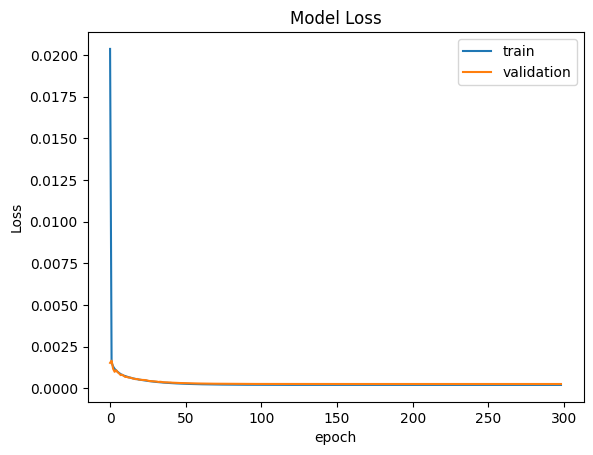

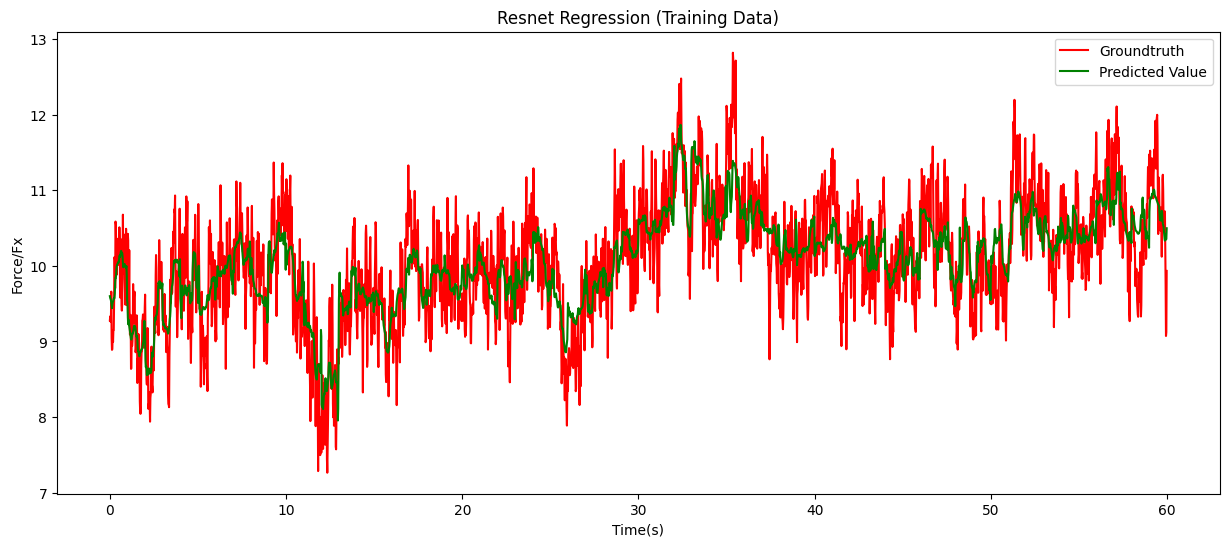

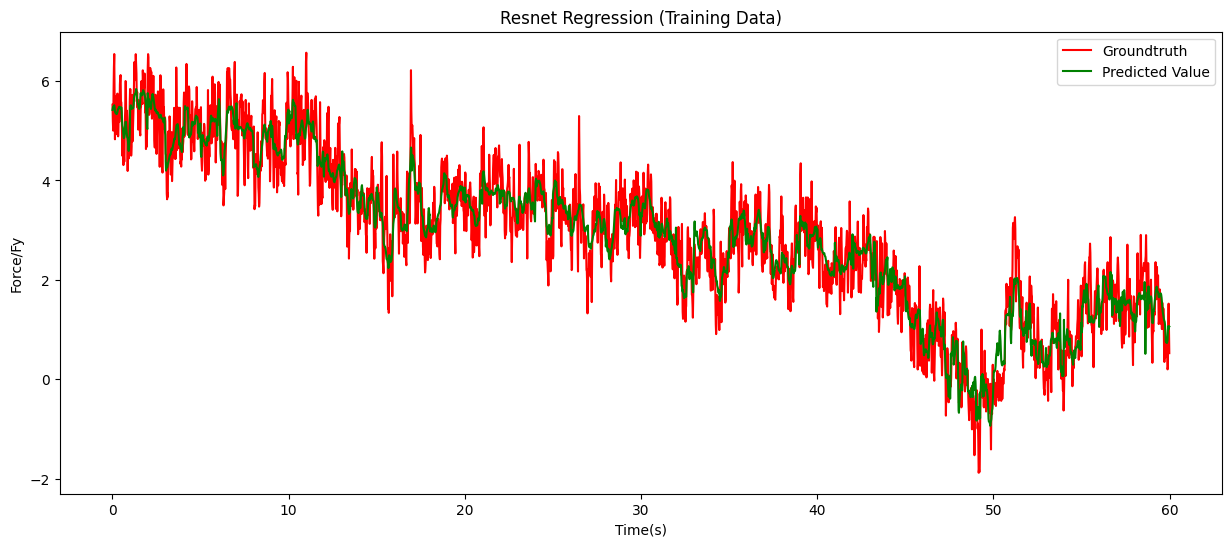

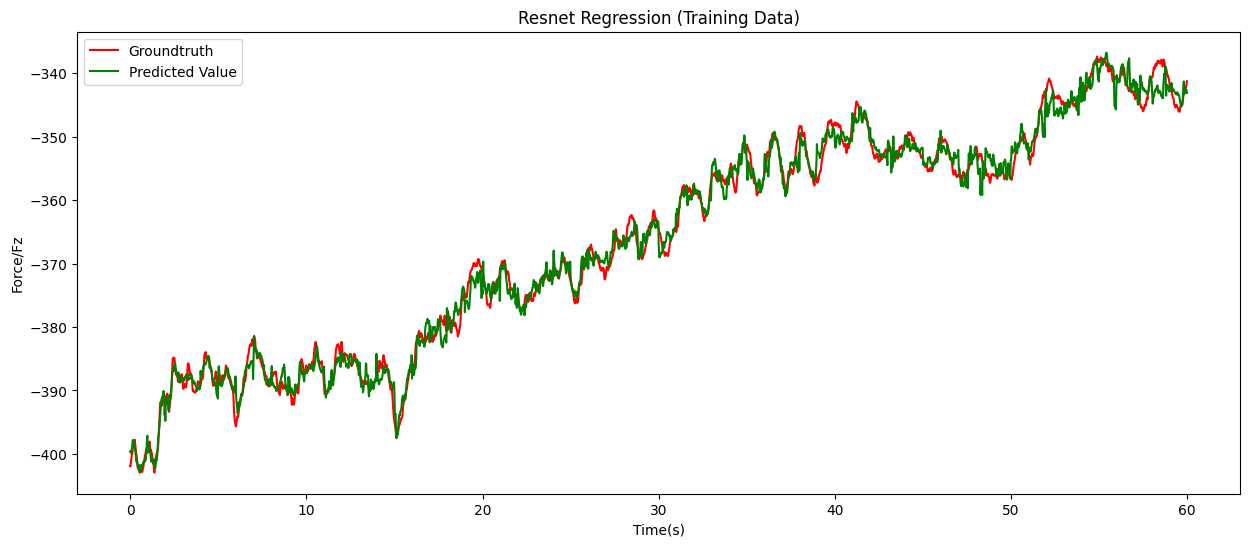

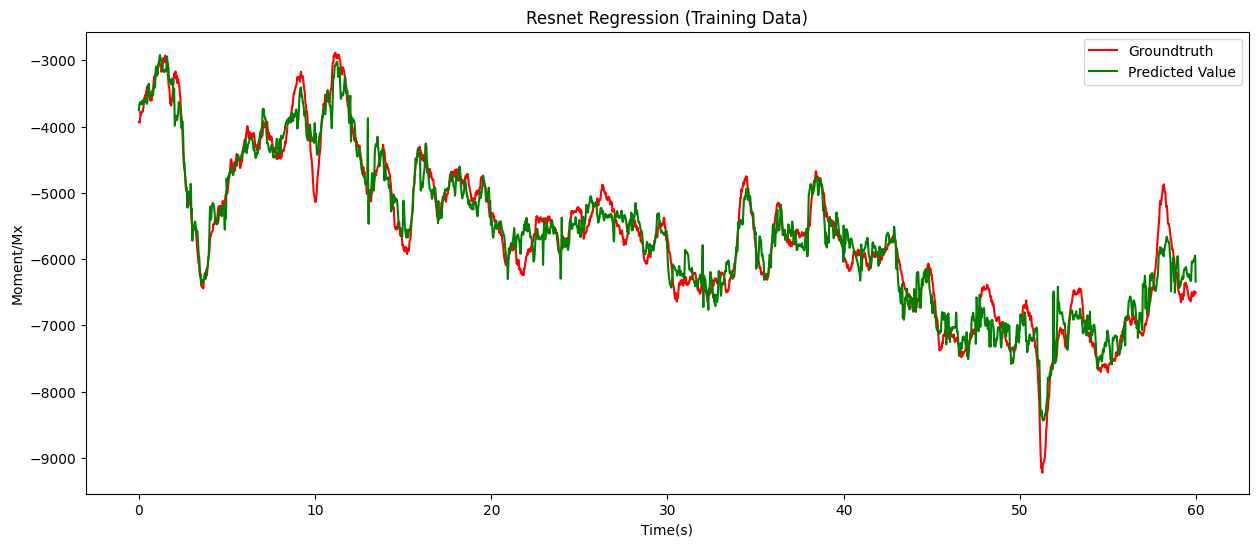

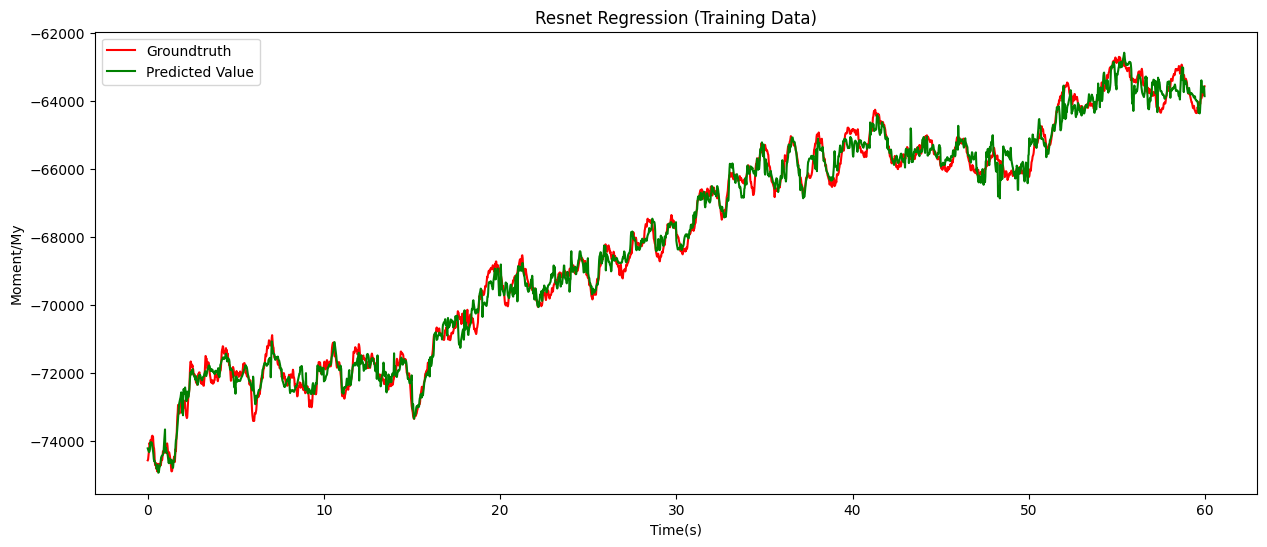

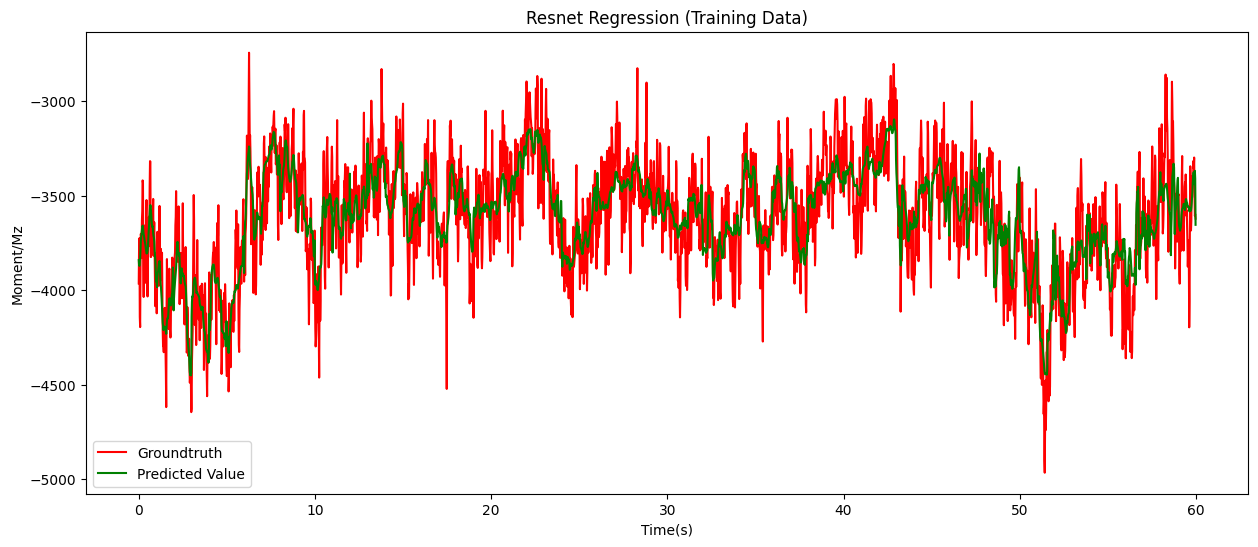

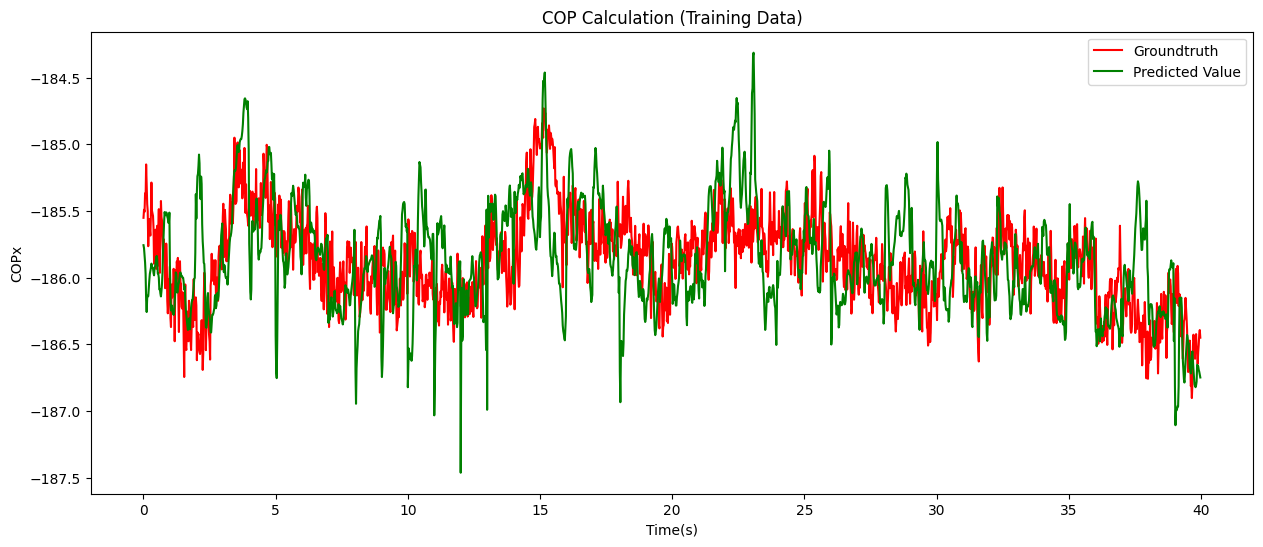

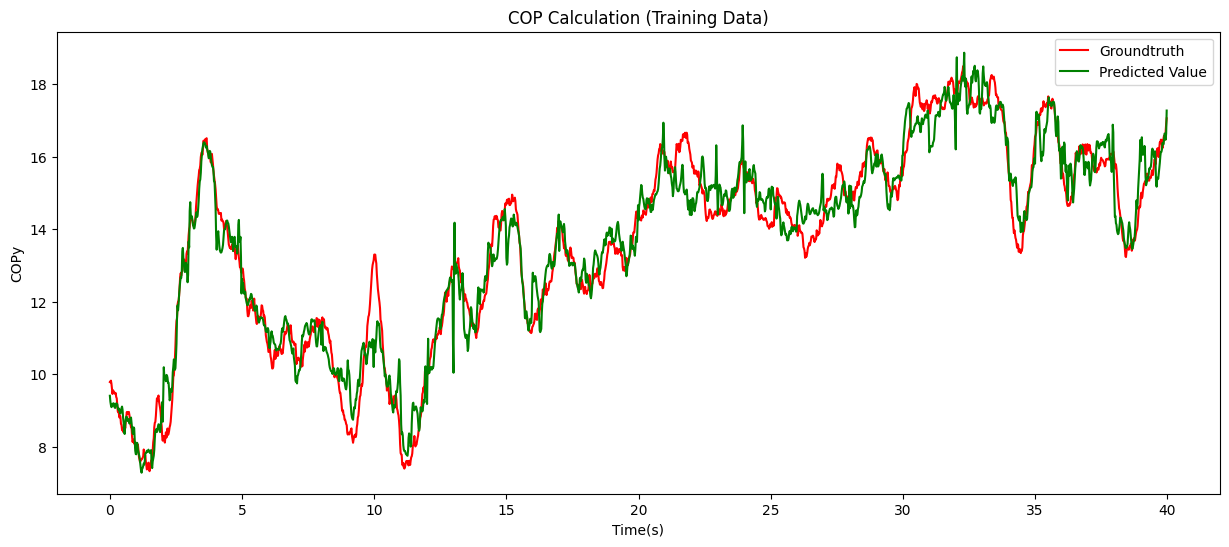

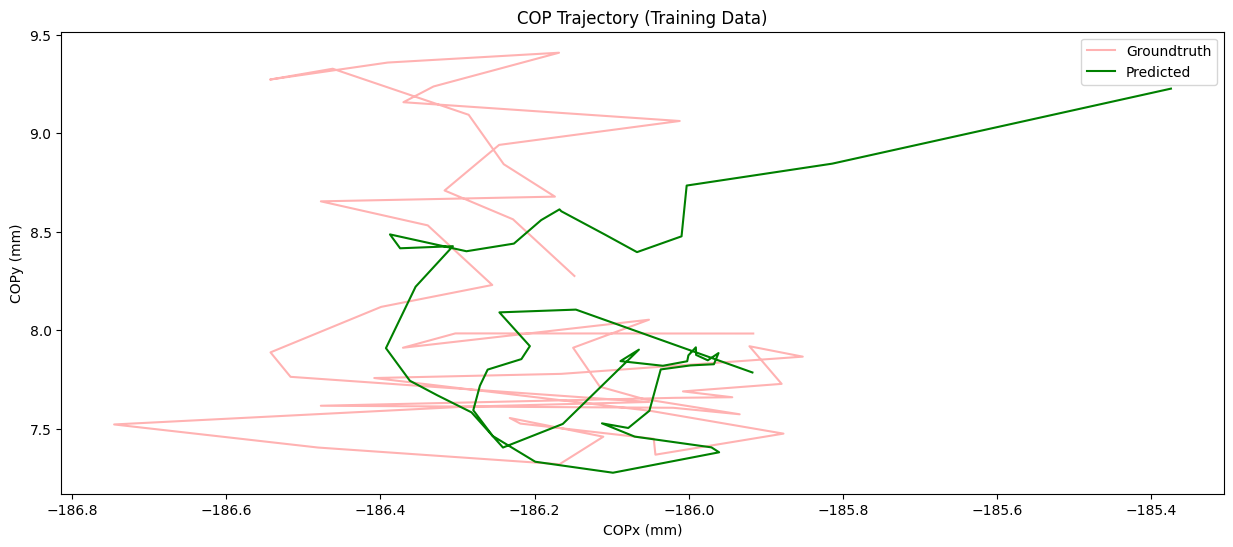

In [13]:
import math
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped, yscale)
ypred = Regression_Model.predict(train_data_reshaped)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

print('MSE: ',mean_squared_error(yscale, ypred))
print('RMSE: ',math.sqrt(mean_squared_error(yscale, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(yscale, ypred))


#Inverse
ypred = scaler_y.inverse_transform(ypred) 
yscale = scaler_y.inverse_transform(yscale) 
y_inverse = yscale
y_pred_inverse = ypred

for i in range(len(y_pred_inverse)):
    if (np.abs(y_pred_inverse[i]) < 1).all():
        y_pred_inverse[i] = 0

for i in range(0, y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

print('MSE: ',mean_squared_error(y_inverse, y_pred_inverse))
print('RMSE: ',math.sqrt(mean_squared_error(y_inverse, y_pred_inverse)))
print('Coefficient of determination (r2 Score): ', r2_score(y_inverse, y_pred_inverse))

# restore to original Data
FXData2 = y_inverse[:,0]*2
FXData2=  np.array(FXData2)
FXData2 = FXData2.reshape(-1,1)

FYData2 = y_inverse[:,1]*5
FYData2 =  np.array(FYData2)
FYData2 = FYData2.reshape(-1,1)

FZData2 = (y_inverse[:,2]*100)
FZData2 =  np.array(FZData2)
FZData2 = FZData2.reshape(-1,1)

MXData2 = (y_inverse[:,3]*10000)
MXData2 =  np.array(MXData2)
MXData2 = MXData2.reshape(-1,1)

MYData2 = (y_inverse[:,4]*10000)
MYData2 =  np.array(MYData2)
MYData2 = MYData2.reshape(-1,1
                          )
MZData2 = (y_inverse[:,5]*1000)
MZData2 =  np.array(MZData2)
MZData2 = MZData2.reshape(-1,1)

new_inverse2 = np.concatenate((FXData2, FYData2, FZData2, MXData2, MYData2, MZData2), axis=1)

FXData3 = y_pred_inverse[:,0]*2
FXData3=  np.array(FXData3)
FXData3 = FXData3.reshape(-1,1)

FYData3 = y_pred_inverse[:,1]*5
FYData3 =  np.array(FYData3)
FYData3 = FYData3.reshape(-1,1)

FZData3 = (y_pred_inverse[:,2]*100)
FZData3 =  np.array(FZData3)
FZData3 = FZData3.reshape(-1,1)

MXData3 = (y_pred_inverse[:,3]*10000)
MXData3 =  np.array(MXData3)
MXData3 = MXData3.reshape(-1,1)

MYData3 = (y_pred_inverse[:,4]*10000)
MYData3 =  np.array(MYData3)
MYData3 = MYData3.reshape(-1,1)

MZData3 = (y_pred_inverse[:,5]*1000)
MZData3 =  np.array(MZData3)
MZData3 = MZData3.reshape(-1,1)

new_inverse3 = np.concatenate((FXData3, FYData3, FZData3, MXData3, MYData3, MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,new_inverse2[0:3000,i],color='red')
    plt.plot(x,new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

out_Fz = new_inverse2[:,2]
out_Mx = new_inverse2[:,3]
out_My = new_inverse2[:,4]
Pred_Fz = new_inverse3[:,2]
Pred_Mx = new_inverse3[:,3]
Pred_My = new_inverse3[:,4]

Pred_COPx=[]
for i in range(0,len(Pred_Fz)):
  Pred_COPx_temp=-(Pred_My[i])/Pred_Fz[i]
  # print(temp)
  if Pred_COPx_temp != Pred_COPx_temp:
    Pred_COPx_temp=0
  Pred_COPx.append(Pred_COPx_temp)
  # break

out_COPx=[]
for i in range(0,len(out_Fz)):
  out_COPx_temp=-(out_My[i])/out_Fz[i]
  # print(temp)
  if out_COPx_temp != out_COPx_temp:
    out_COPx_temp=0
  out_COPx.append(out_COPx_temp)
  # break

Pred_COPy=[]
for i in range(0,len(Pred_Mx)):
  Pred_COPy_temp=Pred_Mx[i]/Pred_Fz[i]
  # print(temp)
  if Pred_COPy_temp != Pred_COPy_temp:
    Pred_COPy_temp=0
  Pred_COPy.append(Pred_COPy_temp)
  # break

out_COPy=[]
for i in range(0,len(out_Mx)):
  out_COPy_temp=out_Mx[i]/out_Fz[i]
  # print(temp)
  if out_COPy_temp != out_COPy_temp:
    out_COPy_temp=0
  out_COPy.append(out_COPy_temp)
  # break


# out_COPx = -(out_My)/out_Fz
out_COPx = np.array(out_COPx)
out_COPx= out_COPx.reshape(-1,1)

# out_COPy = out_Mx/out_Fz
out_COPy = np.array(out_COPy)
out_COPy= out_COPy.reshape(-1,1)

# Pred_COPx = -(Pred_My)/Pred_Fz
Pred_COPx = np.array(Pred_COPx)
Pred_COPx= Pred_COPx.reshape(-1,1)

# Pred_COPy = Pred_Mx/Pred_Fz
Pred_COPy = np.array(Pred_COPy)
Pred_COPy= Pred_COPy.reshape(-1,1)

Pred_COP = np.concatenate((Pred_COPx, Pred_COPy), axis=1)
FC_COP = np.concatenate((out_COPx, out_COPy), axis=1)

col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,FC_COP[0:2000,i], color='red')
    plt.plot(x,Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Training Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
y1 = FC_COP[50:100,0]
y2 = FC_COP[50:100,1]
y3 = Pred_COP[50:100,0]
y4 = Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

data_filter = abs(y1) > 0
data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
pyplot.plot(y1[data_filter], y2[data_filter ], color='red', alpha=0.3)
pyplot.plot(y3[data_filter2], y4[data_filter2 ], color='green')
# pyplot.plot(y1, y2, color='red')
# pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

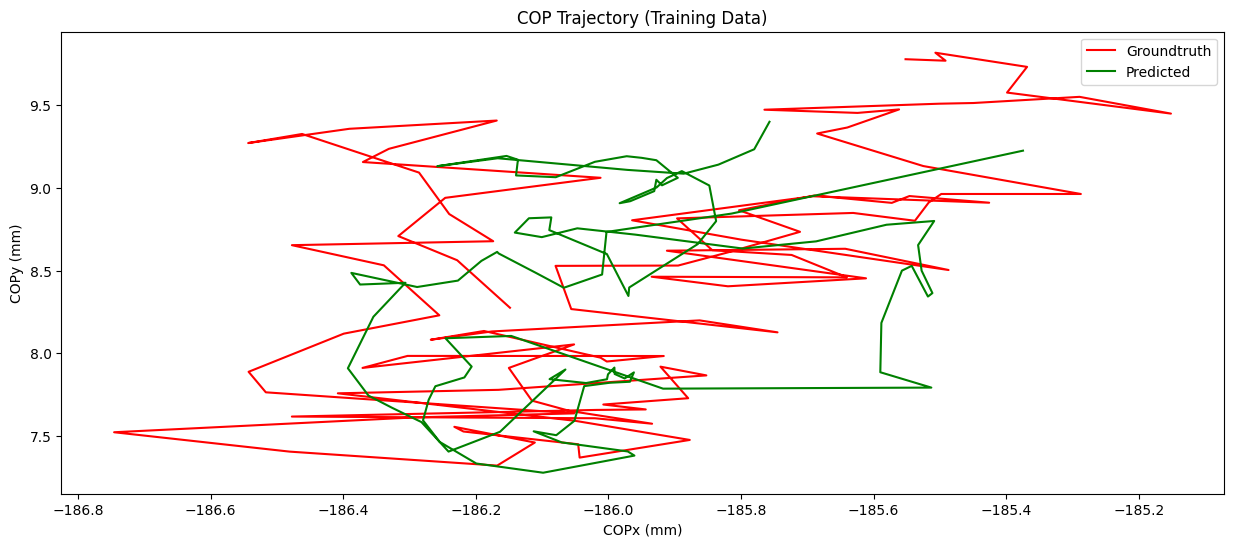

In [14]:
x = range(100)
y1 = FC_COP[0:100,0]
y2 = FC_COP[0:100,1]
y3 = Pred_COP[0:100,0]
y4 = Pred_COP[0:100,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

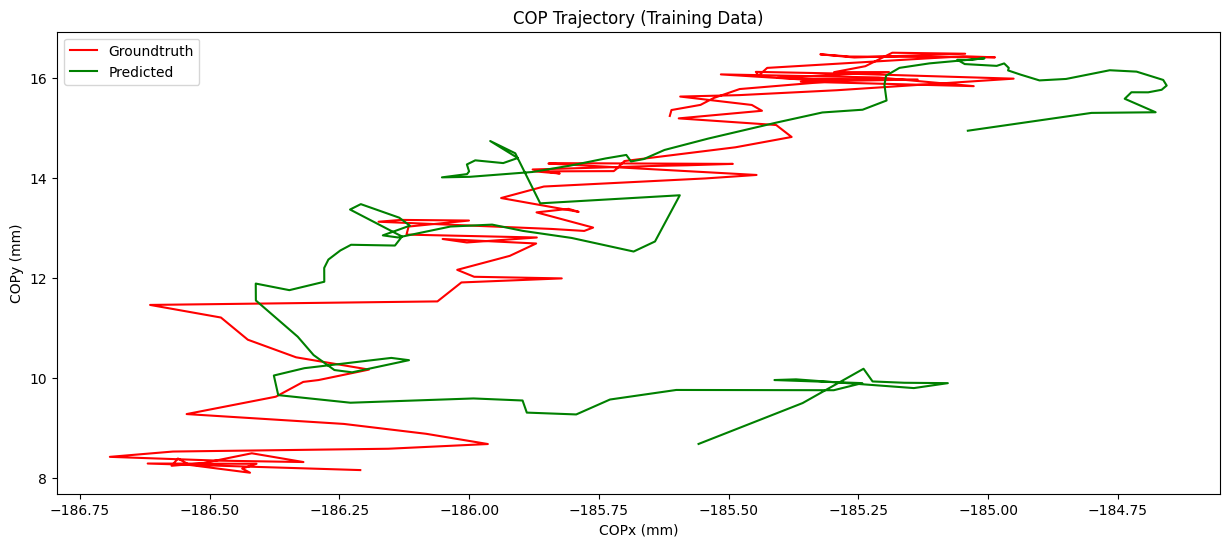

In [15]:
x = range(100)
y1 = FC_COP[100:200,0]
y2 = FC_COP[100:200,1]
y3 = Pred_COP[100:200,0]
y4 = Pred_COP[100:200,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

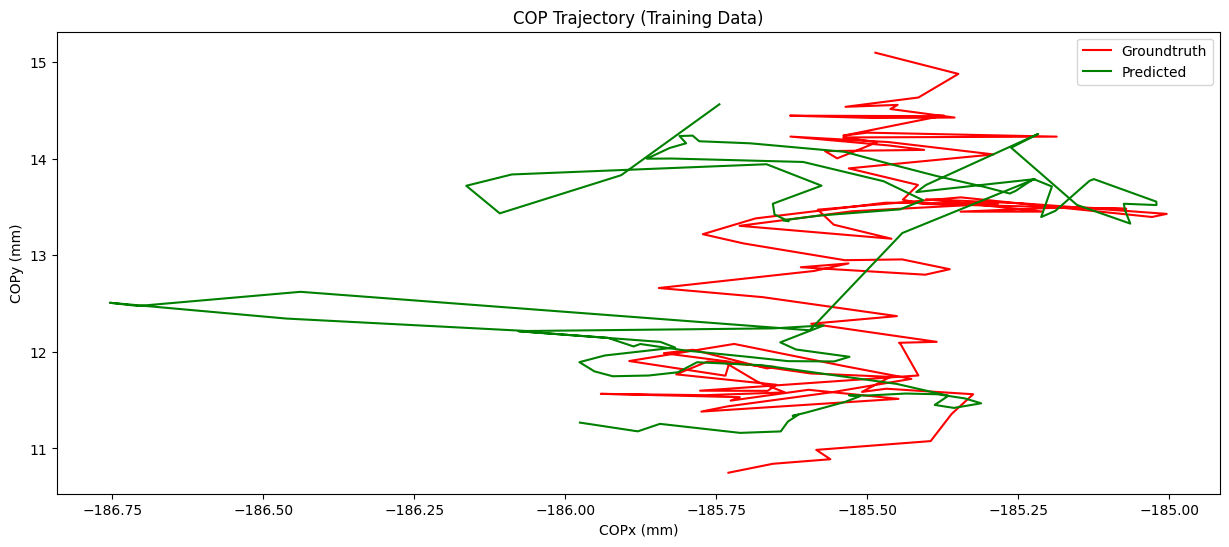

In [16]:
x = range(100)
y1 = FC_COP[200:300,0]
y2 = FC_COP[200:300,1]
y3 = Pred_COP[200:300,0]
y4 = Pred_COP[200:300,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [17]:
new_inverse2[50]

array([     9.505471 ,      5.8400493,   -399.764    ,  -3191.2085   ,
       -74322.71     ,  -3869.2002   ], dtype=float32)

In [18]:
new_inverse3[50]

array([     9.500228,      5.429707,   -399.80554 ,  -3112.5403  ,
       -74330.87    ,  -3922.0273  ], dtype=float32)

In [19]:
new_inverse2[0]

array([     9.27914  ,      5.5224094,   -401.95297  ,  -3930.7896   ,
       -74583.1      ,  -3964.45     ], dtype=float32)

In [20]:
new_inverse3[0]

array([     9.599529 ,      5.4170566,   -399.61487  ,  -3756.6018   ,
       -74231.266    ,  -3841.4045   ], dtype=float32)

In [21]:
y_inverse[50]

array([ 4.7527356 ,  1.1680099 , -3.9976401 , -0.31912085, -7.432271  ,
       -3.8692002 ], dtype=float32)

In [22]:
y_pred_inverse[50]

array([ 4.750114  ,  1.0859414 , -3.9980555 , -0.31125402, -7.4330864 ,
       -3.9220273 ], dtype=float32)

Test and Predict

188/188 [==============================] - 1s 4ms/step


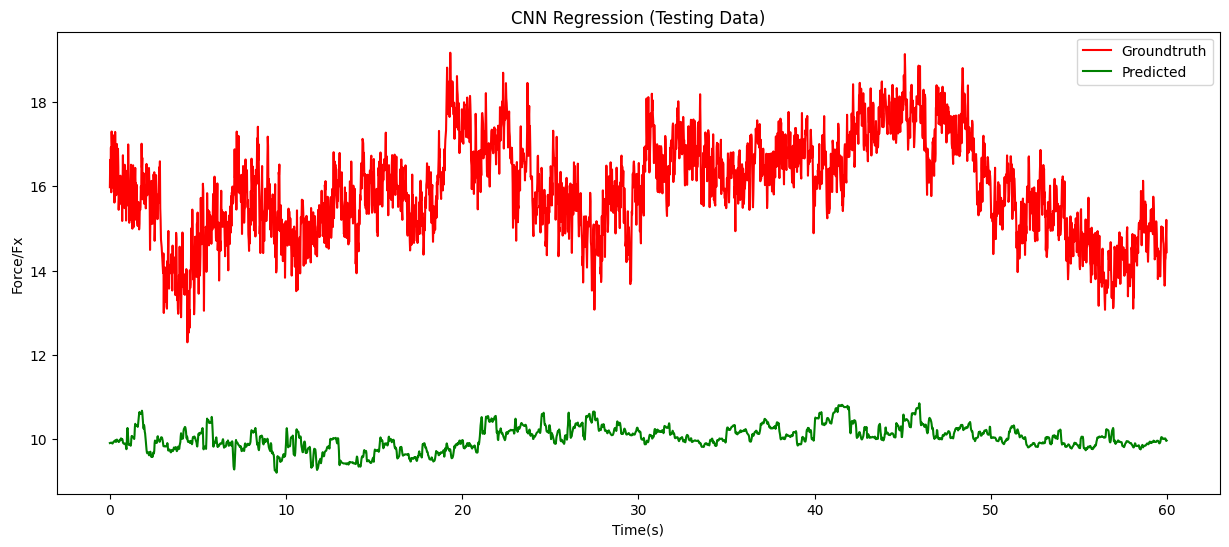

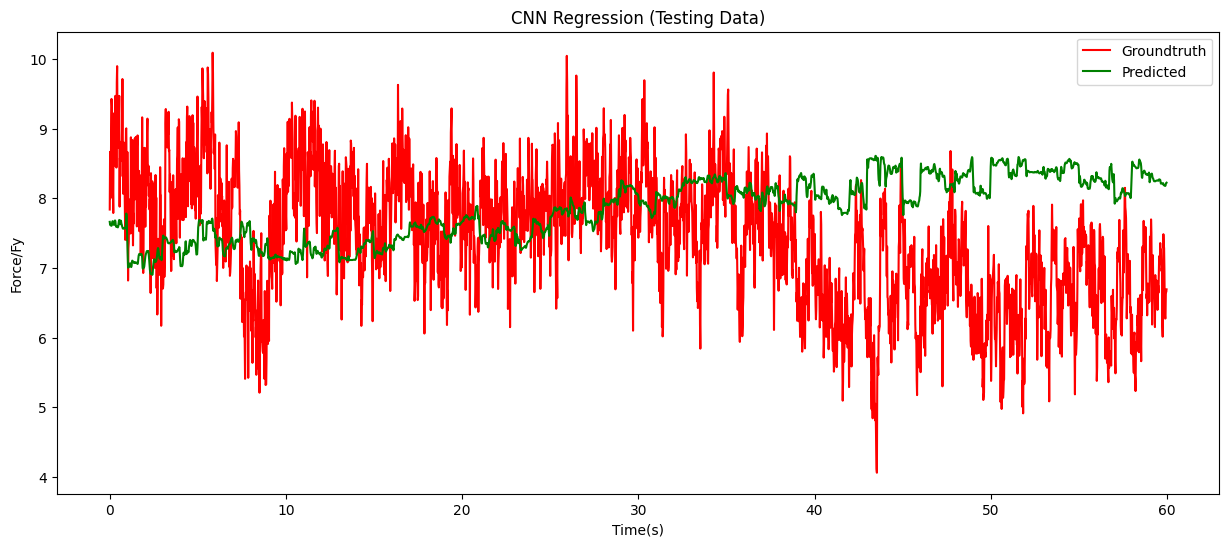

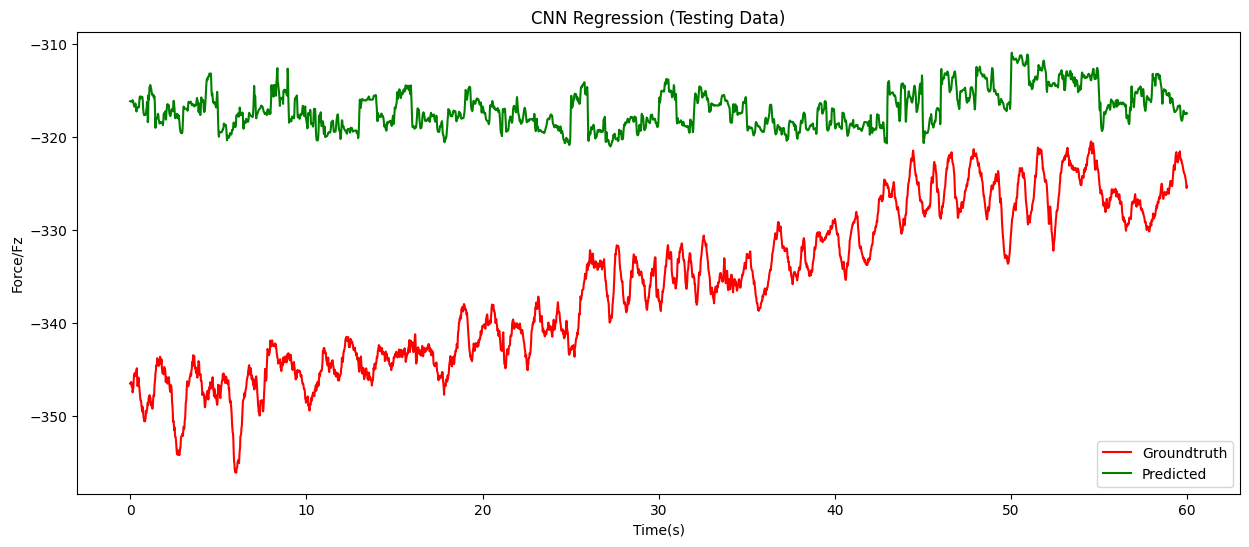

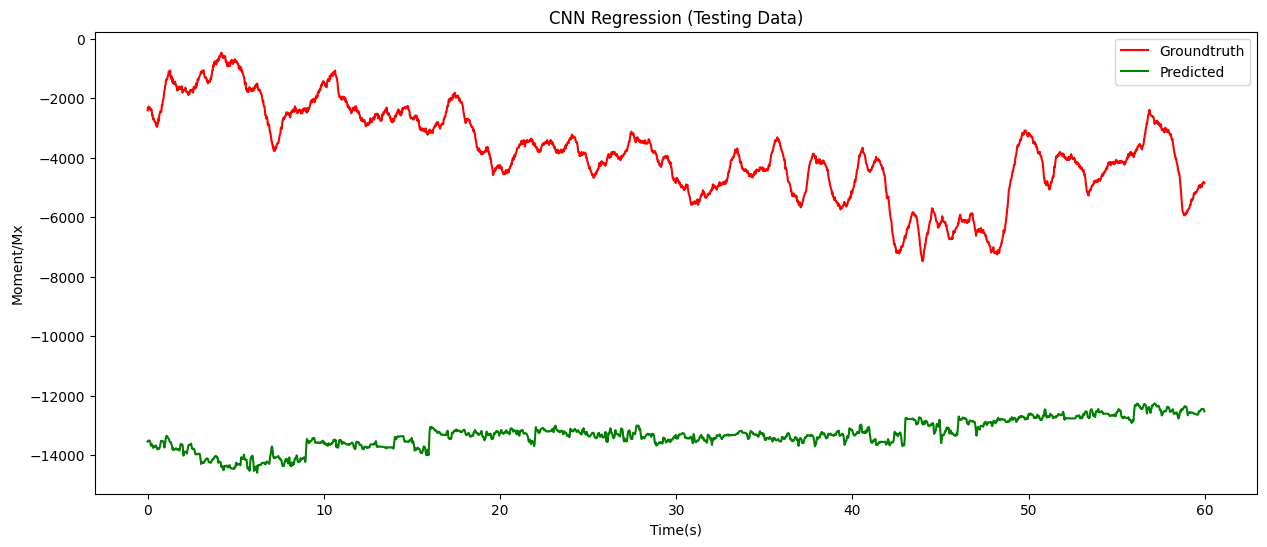

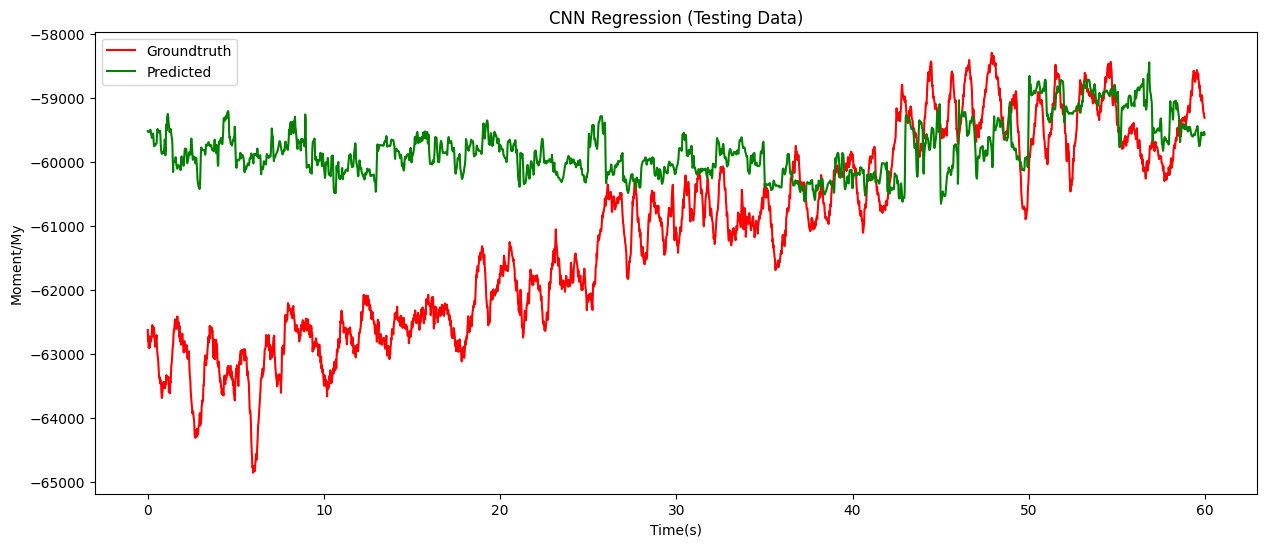

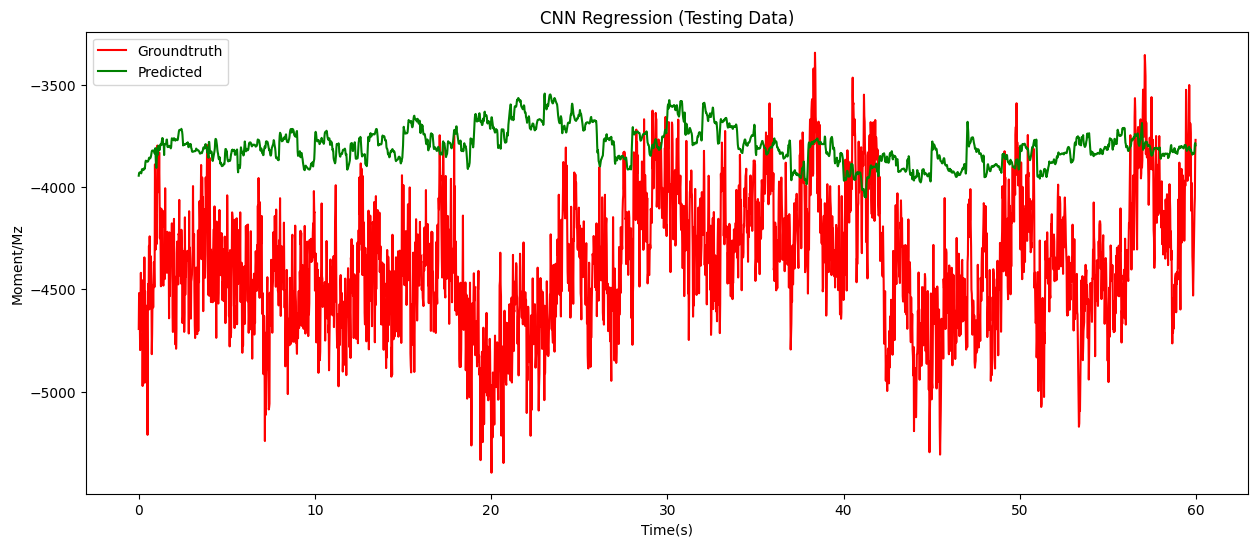

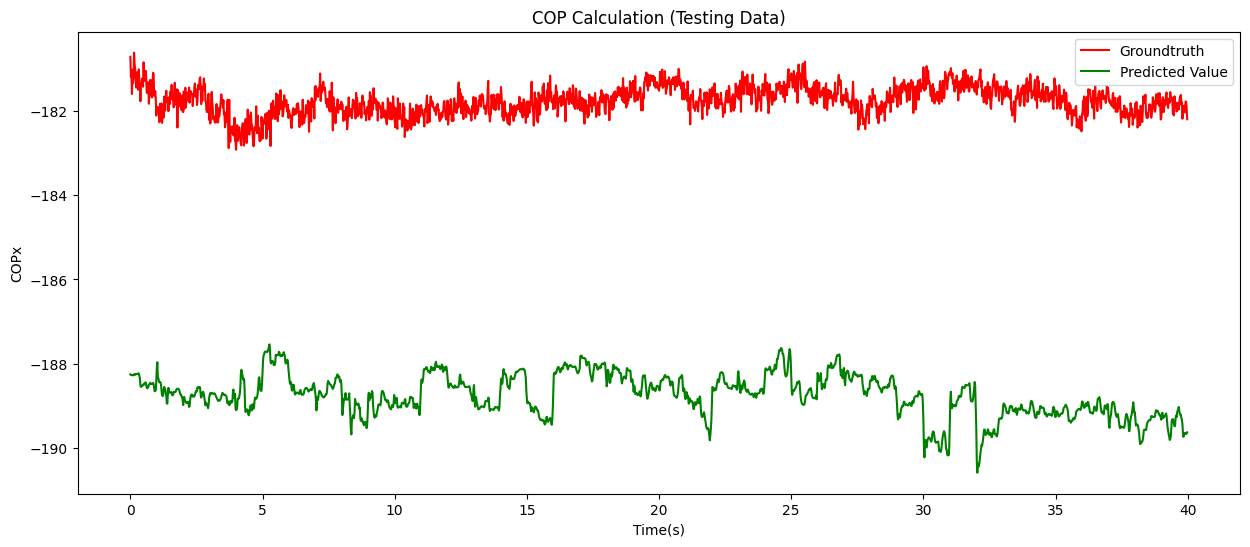

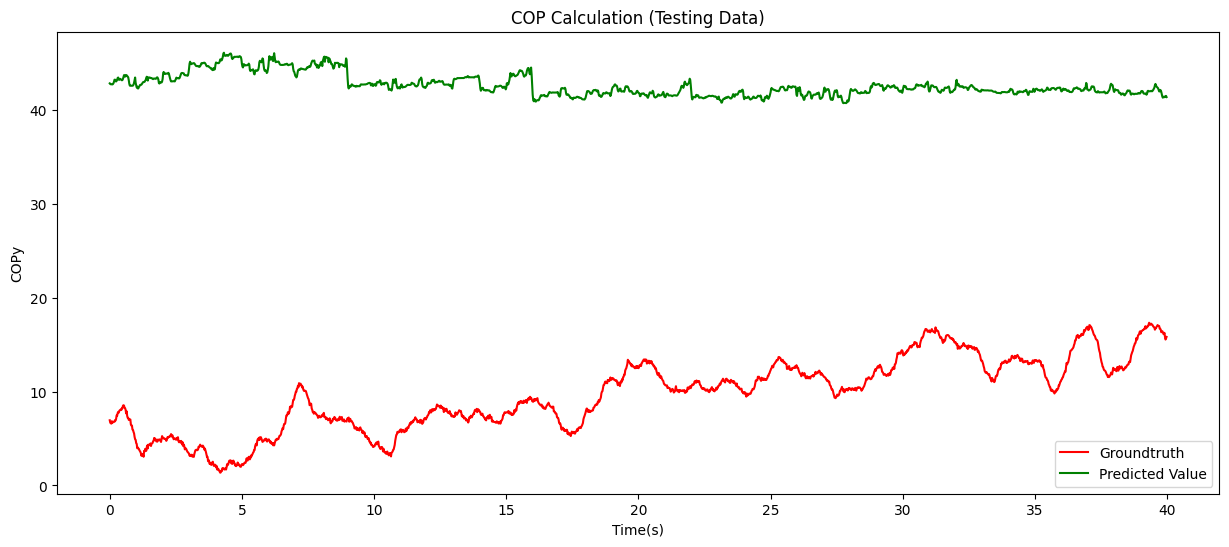

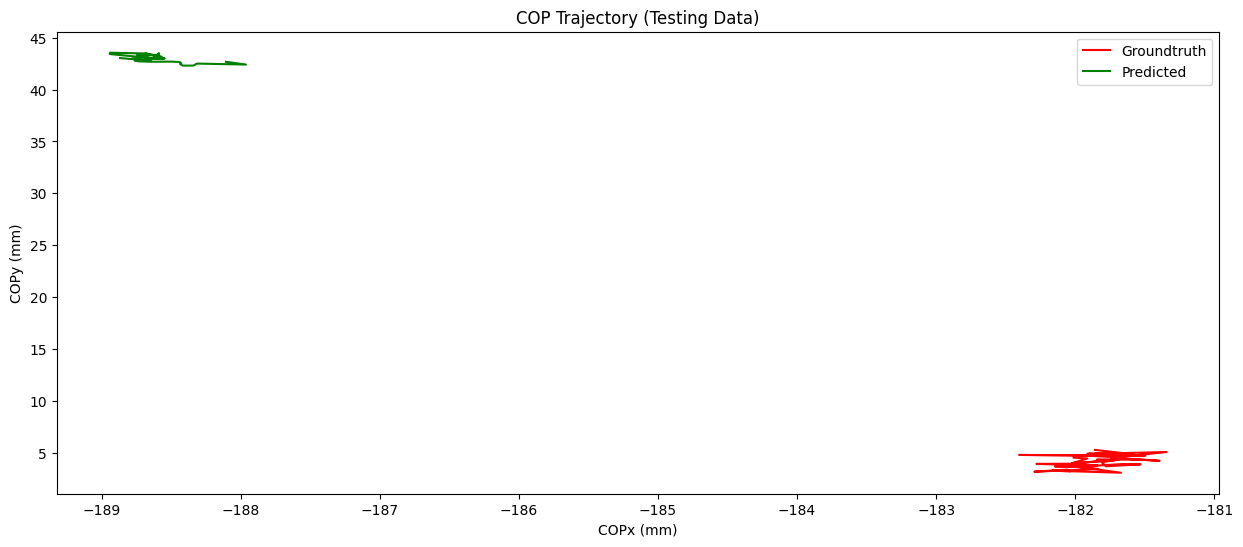

In [23]:
## Model Validation
Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min2.csv', low_memory=False)
Test_columns = ['Fx','Fy','Fz','Mx','My','Mz']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]


test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

Test_FXData = Test_FPData[:,0]/2
Test_FXData =  np.array(Test_FXData)
Test_FXData = Test_FXData.reshape(-1,1)
Test_FYData = Test_FPData[:,1]/5
Test_FYData =  np.array(Test_FYData)
Test_FYData = Test_FYData.reshape(-1,1)
Test_FZData = (Test_FPData[:,2])/100
Test_FZData =  np.array(Test_FZData)
Test_FZData = Test_FZData.reshape(-1,1)
Test_MXData = (Test_FPData[:,3])/10000
Test_MXData =  np.array(Test_MXData)
Test_MXData = Test_MXData.reshape(-1,1)
Test_MYData = (Test_FPData[:,4])/10000
Test_MYData =  np.array(Test_MYData)
Test_MYData =Test_MYData.reshape(-1,1)
Test_MZData = (Test_FPData[:,5])/1000
Test_MZData =  np.array(Test_MZData)
Test_MZData = Test_MZData.reshape(-1,1)

Test_newFPData = np.concatenate((Test_FXData, Test_FYData, Test_FZData, Test_MXData, Test_MYData, Test_MZData), axis=1)
# Test_newFPData = np.round(Test_newFPData,2)
## End Load Data

Test_SIDWTcoeffs = []
for i in range(89):
    coeffsN = pywt.wavedec(test_SmartInsole[:, i], wavelet)
    coeffsN[-1] = np.zeros_like(coeffsN[-1])
    # coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    # coeffs[-7] = np.zeros_like(coeffs[-7])
    Test_SIDWTcoeffs.append(coeffsN)

Test_SIData_filtered = np.zeros(test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(Test_SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    if i < len(Test_SIData_filtered):
        Test_SIData_filtered[i][0] = 0
#         Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
#         iter += 1
    else:
        Test_SIData_filtered[i][0] = 0

# for i in range(len(Test_SIData_filtered)):
#     Test_SIData_filtered[i][0] = i-1
#     iter += 1

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][np.abs(Test_SIData_filtered[i]) < 1] = 0

# scaler_x.fit(Test_SIData_filtered)
Test_xscale = scaler_x.transform(Test_SIData_filtered)
Test_yscale = scaler_y.transform(Test_newFPData)

test_sample_size = Test_xscale.shape[0] # number of samples in train set
test_time_steps  = Test_xscale.shape[1] # number of features in train set
test_input_dimension = 1               # each feature is represented by 1 number

test_train_data_reshaped = Test_xscale.reshape(test_sample_size,test_time_steps,test_input_dimension)

Regression_Model.evaluate(test_train_data_reshaped, Test_yscale)
Test_xX_model = Regression_Model.predict(test_train_data_reshaped)

#invert normalize
Test_xX_model = scaler_y.inverse_transform(Test_xX_model) 
Test_yscale = scaler_y.inverse_transform(Test_yscale) 
Test_y_pred_inverse = Test_xX_model
Test_y_inverse = Test_yscale

for i in range(len(Test_y_pred_inverse)):
    if (np.abs(Test_y_pred_inverse[i]) < 1).all():
        Test_y_pred_inverse[i] = 0

for i in range(0, Test_y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        Test_y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

# make to original Data
Test_FXData2 = Test_y_inverse[:,0]*2
Test_FXData2=  np.array(Test_FXData2)
Test_FXData2 = Test_FXData2.reshape(-1,1)

Test_FYData2 = Test_y_inverse[:,1]*5
Test_FYData2 =  np.array(Test_FYData2)
Test_FYData2 = Test_FYData2.reshape(-1,1)

Test_FZData2 = (Test_y_inverse[:,2]*100)
Test_FZData2 =  np.array(Test_FZData2)
Test_FZData2 = Test_FZData2.reshape(-1,1)

Test_MXData2 = (Test_y_inverse[:,3]*10000)
Test_MXData2 =  np.array(Test_MXData2)
Test_MXData2 = Test_MXData2.reshape(-1,1)

Test_MYData2 = (Test_y_inverse[:,4]*10000)
Test_MYData2 =  np.array(Test_MYData2)
Test_MYData2 = Test_MYData2.reshape(-1,1
                          )
Test_MZData2 = (Test_y_inverse[:,5]*1000)
Test_MZData2 =  np.array(Test_MZData2)
Test_MZData2 = Test_MZData2.reshape(-1,1)


Test_new_inverse2 = np.concatenate((Test_FXData2, Test_FYData2, Test_FZData2, Test_MXData2, Test_MYData2, Test_MZData2), axis=1)

Test_FXData3 = Test_y_pred_inverse[:,0]*2
Test_FXData3=  np.array(Test_FXData3)
Test_FXData3 = Test_FXData3.reshape(-1,1)

Test_FYData3 = Test_y_pred_inverse[:,1]*5
Test_FYData3 =  np.array(Test_FYData3)
Test_FYData3 = Test_FYData3.reshape(-1,1)

Test_FZData3 = (Test_y_pred_inverse[:,2]*100)
Test_FZData3 =  np.array(Test_FZData3)
Test_FZData3 = Test_FZData3.reshape(-1,1)

Test_MXData3 = (Test_y_pred_inverse[:,3]*10000)
Test_MXData3 =  np.array(Test_MXData3)
Test_MXData3 = Test_MXData3.reshape(-1,1)

Test_MYData3 = (Test_y_pred_inverse[:,4]*10000)
Test_MYData3 =  np.array(Test_MYData3)
Test_MYData3 = Test_MYData3.reshape(-1,1)

Test_MZData3 = (Test_y_pred_inverse[:,5]*1000)
Test_MZData3 =  np.array(Test_MZData3)
Test_MZData3 = Test_MZData3.reshape(-1,1)

Test_new_inverse3 = np.concatenate((Test_FXData3, Test_FYData3, Test_FZData3, Test_MXData3, Test_MYData3, Test_MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_new_inverse2[0:3000,i],color='red')
    plt.plot(x,Test_new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('CNN Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

Test_out_Fz = Test_new_inverse2[:,2]
Test_out_Mx = Test_new_inverse2[:,3]
Test_out_My = Test_new_inverse2[:,4]
Test_Pred_Fz = Test_new_inverse3[:,2]
Test_Pred_Mx = Test_new_inverse3[:,3]
Test_Pred_My = Test_new_inverse3[:,4]

Test_Pred_COPx=[]
for i in range(0,len(Test_Pred_Fz)):
  Test_Pred_COPx_temp=-(Test_Pred_My[i])/Test_Pred_Fz[i]
  if Test_Pred_COPx_temp != Test_Pred_COPx_temp:
    Test_Pred_COPx_temp=0
  Test_Pred_COPx.append(Test_Pred_COPx_temp)
  # break

Test_out_COPx=[]
for i in range(0,len(Test_out_Fz)):
  Test_out_COPx_temp=-(Test_out_My[i])/Test_out_Fz[i]
  if Test_out_COPx_temp != Test_out_COPx_temp:
    Test_out_COPx_temp=0
  Test_out_COPx.append(Test_out_COPx_temp)
  # break

Test_Pred_COPy=[]
for i in range(0,len(Test_Pred_Mx)):
  Test_Pred_COPy_temp=Test_Pred_Mx[i]/Test_Pred_Fz[i]
  if Test_Pred_COPy_temp != Test_Pred_COPy_temp:
    Test_Pred_COPy_temp=0
  Test_Pred_COPy.append(Test_Pred_COPy_temp)
  # break

Test_out_COPy=[]
for i in range(0,len(Test_out_Mx)):
  Test_out_COPy_temp=Test_out_Mx[i]/Test_out_Fz[i]
  if Test_out_COPy_temp != Test_out_COPy_temp:
    Test_out_COPy_temp=0
  Test_out_COPy.append(Test_out_COPy_temp)
  # break


Test_out_COPx = np.array(Test_out_COPx)
Test_out_COPx= Test_out_COPx.reshape(-1,1)

Test_out_COPy = np.array(Test_out_COPy)
Test_out_COPy= Test_out_COPy.reshape(-1,1)

Test_Pred_COPx = np.array(Test_Pred_COPx)
Test_Pred_COPx= Test_Pred_COPx.reshape(-1,1)

Test_Pred_COPy = np.array(Test_Pred_COPy)
Test_Pred_COPy= Test_Pred_COPy.reshape(-1,1)

Test_Pred_COP = np.concatenate((Test_Pred_COPx, Test_Pred_COPy), axis=1)
Test_FC_COP = np.concatenate((Test_out_COPx, Test_out_COPy), axis=1)

Test_col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,Test_FC_COP[0:2000,i], color='red')
    plt.plot(x,Test_Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Testing Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
Test_y1 = Test_FC_COP[50:100,0]
Test_y2 = Test_FC_COP[50:100,1]
Test_y3 = Test_Pred_COP[50:100,0]
Test_y4 = Test_Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

# Test_data_filter = abs(y1) > 0
# Test_data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
# pyplot.plot(Test_y1[Test_data_filter], Test_y2[Test_data_filter ], color='red', alpha=0.3)
# pyplot.plot(Test_y3[Test_data_filter2], Test_y4[Test_data_filter2 ], color='green')
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Testing Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [24]:
Test_SIData_filtered[50]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  32.99998093,  58.70505524,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  61.90723419,  72.89530945,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  50.41194916,  72.70506287,  51.70506668,
         0.        ,  47.99999619,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        65.99994659,  67.12586212,  15.70508289,   8.68568039,
        17.22666168,  15.115242  ,   0.        ,   1.35254157,
        29.70507622,  69.21788788,  49.3612709 ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  15.99998951,  38.70506668,
         0.        ,  36.49886703,  66.20394135,  39.55

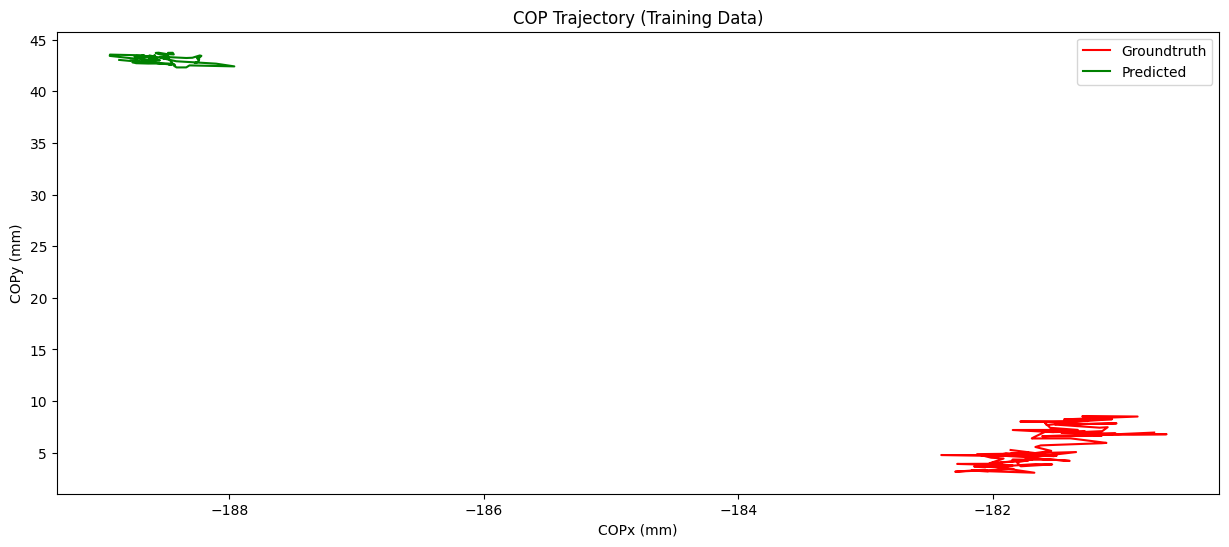

In [25]:
x = range(100)
Test_y1 = Test_FC_COP[0:100,0]
Test_y2 = Test_FC_COP[0:100,1]
Test_y3 = Test_Pred_COP[0:100,0]
Test_y4 = Test_Pred_COP[0:100,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

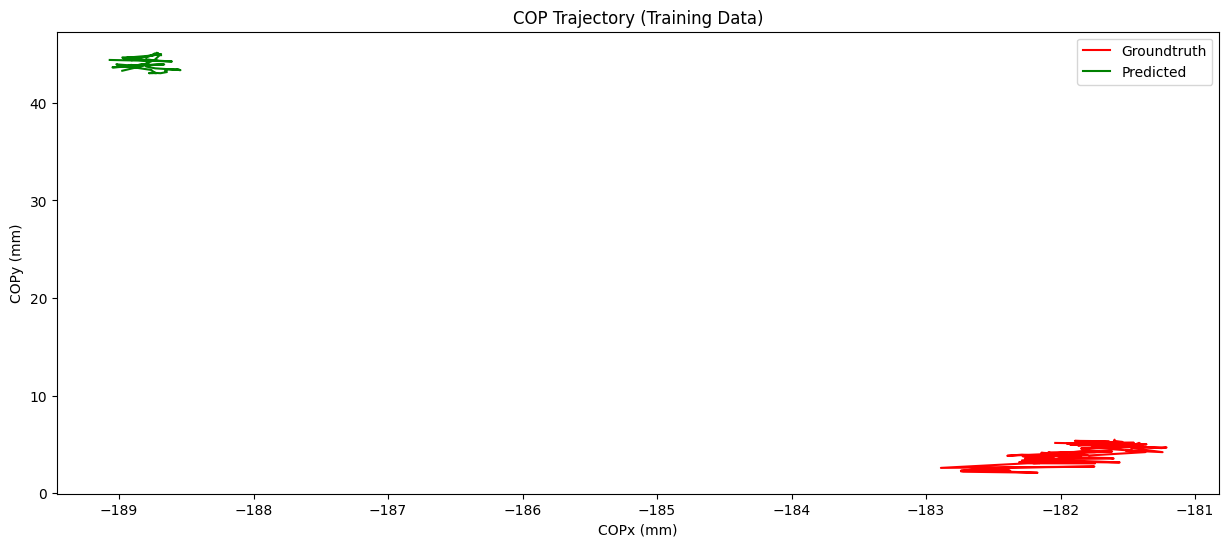

In [26]:
x = range(100)
Test_y1 = Test_FC_COP[100:200,0]
Test_y2 = Test_FC_COP[100:200,1]
Test_y3 = Test_Pred_COP[100:200,0]
Test_y4 = Test_Pred_COP[100:200,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

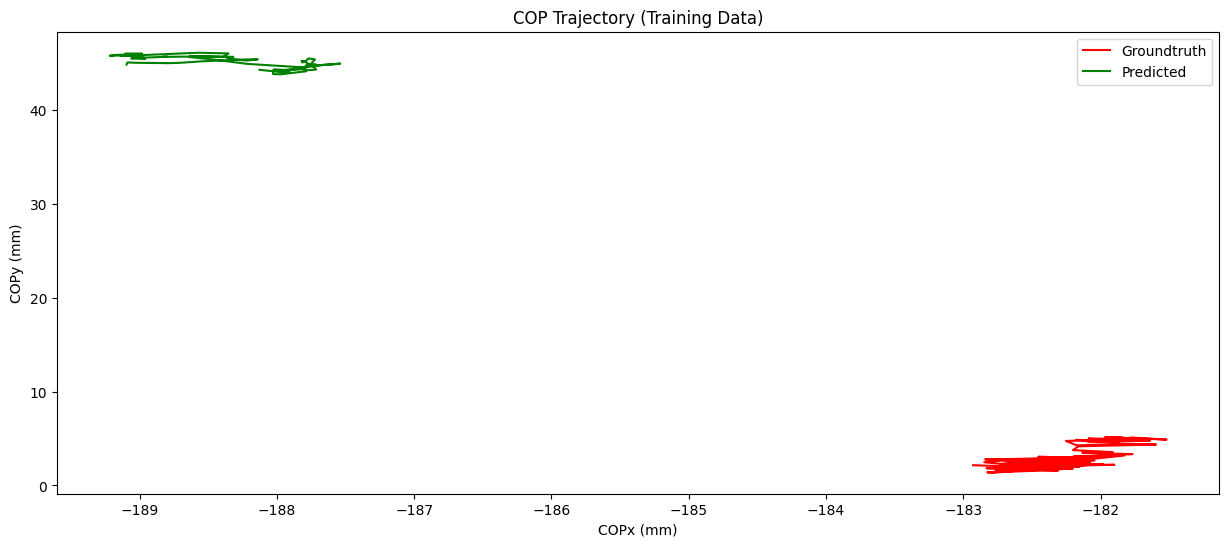

In [27]:
x = range(100)
Test_y1 = Test_FC_COP[200:300,0]
Test_y2 = Test_FC_COP[200:300,1]
Test_y3 = Test_Pred_COP[200:300,0]
Test_y4 = Test_Pred_COP[200:300,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [28]:
## Model Validation
Test_Insole = pd.read_csv('0312AryaStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0312AryaStand5Min2.csv', low_memory=False)
Test_columns = ['Fx','Fy','Fz','Mx','My','Mz']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]


test_SmartInsole = np.array(TestSIData[:6000]).astype('float64')
Test_FPData = np.array(Test_FPDatas).astype('float64')

Test_FXData = Test_FPData[:,0]/10
Test_FXData =  np.array(Test_FXData)
Test_FXData = Test_FXData.reshape(-1,1)
Test_FYData = Test_FPData[:,1]/5
Test_FYData =  np.array(Test_FYData)
Test_FYData = Test_FYData.reshape(-1,1)
Test_FZData = (Test_FPData[:,2])/10
Test_FZData =  np.array(Test_FZData)
Test_FZData = Test_FZData.reshape(-1,1)
Test_MXData = (Test_FPData[:,3])/1000
Test_MXData =  np.array(Test_MXData)
Test_MXData = Test_MXData.reshape(-1,1)
Test_MYData = (Test_FPData[:,4])/10000
Test_MYData =  np.array(Test_MYData)
Test_MYData =Test_MYData.reshape(-1,1)
Test_MZData = (Test_FPData[:,5])/100
Test_MZData =  np.array(Test_MZData)
Test_MZData = Test_MZData.reshape(-1,1)

Test_newFPData = np.concatenate((Test_FXData, Test_FYData, Test_FZData, Test_MXData, Test_MYData, Test_MZData), axis=1)
## End Load Data
Test_newFPData = abs(Test_newFPData)

Test_SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    # coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    # coeffs[-7] = np.zeros_like(coeffs[-7])
    Test_SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(Test_SIDWTcoeffs[i], 'db4', mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    if i < len(Test_SIData_filtered):
        Test_SIData_filtered[i][0] = 0
        # Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
        iter += 1
    else:
        Test_SIData_filtered[i][0] = 0

# for i in range(len(Test_SIData_filtered)):
#     Test_SIData_filtered[i][0] = i-1
#     iter += 1

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][np.abs(Test_SIData_filtered[i]) < 1] = 0

Test_xscale = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )

Test_yscale = []
for i in range(0,6):
  Test_scale = (Test_newFPData[:,i] - FPmin[i]) / ( FPmax[i] - FPmin[i] )
  Test_yscale.append(Test_scale)
Test_yscale = np.array(Test_yscale)
Test_yscale = Test_yscale.transpose()

test_sample_size = Test_xscale.shape[0] # number of samples in train set
test_time_steps  = Test_xscale.shape[1] # number of features in train set
test_input_dimension = 1               # each feature is represented by 1 number

test_train_data_reshaped = Test_xscale.reshape(test_sample_size,test_time_steps,test_input_dimension)

Regression_Model.evaluate(test_train_data_reshaped, Test_yscale)
Test_xX_model = Regression_Model.predict(test_train_data_reshaped)

#invert normalize
Test_y_inverse = []
Test_y_pred_inverse = []

for i in range(0,6):
  Test_Y_inver =  Test_yscale[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_Pred_inver = Test_xX_model[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_y_inverse.append(Test_Y_inver)
  Test_y_pred_inverse.append(Test_Pred_inver)
Test_y_inverse = np.array(Test_y_inverse)
Test_y_inverse = Test_y_inverse.transpose()
Test_y_pred_inverse = np.array(Test_y_pred_inverse)
Test_y_pred_inverse = Test_y_pred_inverse.transpose()

for i in range(len(Test_y_pred_inverse)):
    if (np.abs(Test_y_pred_inverse[i]) < 1).all():
        Test_y_pred_inverse[i] = 0

for i in range(0, Test_y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        Test_y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

# make to original Data
Test_FXData2 = Test_y_inverse[:,0]*10
Test_FXData2=  np.array(Test_FXData2)
Test_FXData2 = Test_FXData2.reshape(-1,1)

Test_FYData2 = Test_y_inverse[:,1]*10
Test_FYData2 =  np.array(Test_FYData2)
Test_FYData2 = Test_FYData2.reshape(-1,1)

Test_FZData2 = (Test_y_inverse[:,2]*10)
Test_FZData2 =  np.array(Test_FZData2)
Test_FZData2 = Test_FZData2.reshape(-1,1)

Test_MXData2 = (Test_y_inverse[:,3]*1000)
Test_MXData2 =  np.array(Test_MXData2)
Test_MXData2 = Test_MXData2.reshape(-1,1)

Test_MYData2 = (Test_y_inverse[:,4]*10000)
Test_MYData2 =  np.array(Test_MYData2)
Test_MYData2 = Test_MYData2.reshape(-1,1
                          )
Test_MZData2 = (Test_y_inverse[:,5]*100)
Test_MZData2 =  np.array(Test_MZData2)
Test_MZData2 = Test_MZData2.reshape(-1,1)

Test_new_inverse2 = np.concatenate((Test_FXData2, Test_FYData2, Test_FZData2, Test_MXData2, Test_MYData2, Test_MZData2), axis=1)

Test_FXData3 = Test_y_pred_inverse[:,0]*10
Test_FXData3=  np.array(Test_FXData3)
Test_FXData3 = Test_FXData3.reshape(-1,1)

Test_FYData3 = Test_y_pred_inverse[:,1]*10
Test_FYData3 =  np.array(Test_FYData3)
Test_FYData3 = Test_FYData3.reshape(-1,1)

Test_FZData3 = (Test_y_pred_inverse[:,2]*10)
Test_FZData3 =  np.array(Test_FZData3)
Test_FZData3 = Test_FZData3.reshape(-1,1)

Test_MXData3 = (Test_y_pred_inverse[:,3]*1000)
Test_MXData3 =  np.array(Test_MXData3)
Test_MXData3 = Test_MXData3.reshape(-1,1)

Test_MYData3 = (Test_y_pred_inverse[:,4]*10000)
Test_MYData3 =  np.array(Test_MYData3)
Test_MYData3 = Test_MYData3.reshape(-1,1)

Test_MZData3 = (Test_y_pred_inverse[:,5]*100)
Test_MZData3 =  np.array(Test_MZData3)
Test_MZData3 = Test_MZData3.reshape(-1,1)

Test_new_inverse3 = np.concatenate((Test_FXData3, Test_FYData3, Test_FZData3, Test_MXData3, Test_MYData3, Test_MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_new_inverse2[0:3000,i],color='red')
    plt.plot(x,Test_new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('CNN Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

Test_out_Fz = Test_new_inverse2[:,2]
Test_out_Mx = Test_new_inverse2[:,3]
Test_out_My = Test_new_inverse2[:,4]
Test_Pred_Fz = Test_new_inverse3[:,2]
Test_Pred_Mx = Test_new_inverse3[:,3]
Test_Pred_My = Test_new_inverse3[:,4]

Test_Pred_COPx=[]
for i in range(0,len(Test_Pred_Fz)):
  Test_Pred_COPx_temp=-(Test_Pred_My[i])/Test_Pred_Fz[i]
  if Test_Pred_COPx_temp != Test_Pred_COPx_temp:
    Test_Pred_COPx_temp=0
  Test_Pred_COPx.append(Test_Pred_COPx_temp)
  # break

Test_out_COPx=[]
for i in range(0,len(Test_out_Fz)):
  Test_out_COPx_temp=-(Test_out_My[i])/Test_out_Fz[i]
  if Test_out_COPx_temp != Test_out_COPx_temp:
    Test_out_COPx_temp=0
  Test_out_COPx.append(Test_out_COPx_temp)
  # break

Test_Pred_COPy=[]
for i in range(0,len(Test_Pred_Mx)):
  Test_Pred_COPy_temp=Test_Pred_Mx[i]/Test_Pred_Fz[i]
  if Test_Pred_COPy_temp != Test_Pred_COPy_temp:
    Test_Pred_COPy_temp=0
  Test_Pred_COPy.append(Test_Pred_COPy_temp)
  # break

Test_out_COPy=[]
for i in range(0,len(Test_out_Mx)):
  Test_out_COPy_temp=Test_out_Mx[i]/Test_out_Fz[i]
  if Test_out_COPy_temp != Test_out_COPy_temp:
    Test_out_COPy_temp=0
  Test_out_COPy.append(Test_out_COPy_temp)
  # break


Test_out_COPx = np.array(Test_out_COPx)
Test_out_COPx= Test_out_COPx.reshape(-1,1)

Test_out_COPy = np.array(Test_out_COPy)
Test_out_COPy= Test_out_COPy.reshape(-1,1)

Test_Pred_COPx = np.array(Test_Pred_COPx)
Test_Pred_COPx= Test_Pred_COPx.reshape(-1,1)

Test_Pred_COPy = np.array(Test_Pred_COPy)
Test_Pred_COPy= Test_Pred_COPy.reshape(-1,1)

Test_Pred_COP = np.concatenate((Test_Pred_COPx, Test_Pred_COPy), axis=1)
Test_FC_COP = np.concatenate((Test_out_COPx, Test_out_COPy), axis=1)

Test_col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,Test_FC_COP[0:2000,i], color='red')
    plt.plot(x,Test_Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Testing Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
Test_y1 = Test_FC_COP[50:100,0]
Test_y2 = Test_FC_COP[50:100,1]
Test_y3 = Test_Pred_COP[50:100,0]
Test_y4 = Test_Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

# Test_data_filter = abs(y1) > 0
# Test_data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
# pyplot.plot(Test_y1[Test_data_filter], Test_y2[Test_data_filter ], color='red', alpha=0.3)
# pyplot.plot(Test_y3[Test_data_filter2], Test_y4[Test_data_filter2 ], color='green')
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Testing Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

NameError: name 'minInsole' is not defined